<h1> And if the dam breaks open many years too soon, <br>
 And if there is no room upon the hill, <br>
 And if your head explodes with dark forebodings too, <br>
 I'll see you on the dark side of the moon.</h1>

 ___

We're building a neural network from scratch here, and our objective is to perform a classification task on the nnfs spiral dataset with 1000 samples and 3 classes (red, blue and green). We begin by importing the libraries required for this task.

In [98]:
import sys
import numpy as np
import matplotlib.pyplot as plt


In [99]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("dark_background")

We start by implementing numpy's dot product function for calculating the dot product of two matrices.

In [100]:
inputs = np.array([1, 2, 3, 4, 2.5])
weights = np.array([[0.2, 0.8, -0.5, 1.0, 0.5],
          [0.5, -0.91, 0.26, -0.5, 0.1],
          [-0.26, -0.27, 0.17, 0.87, 0.5]])
bias = np.array([2.0, 3.0, 0.5])
layer_outputs = []

layer_outputs = np.dot(weights, inputs) + bias
print(layer_outputs)

[7.55000019 0.71000004 4.94000006]


For a batch of inputs, the code for calculating the the outputs from a certain neuron or layer of neurons (3 in this example) changes. <br>
In a real life setting, we're more likely to work with a dataset with multiple entries where we will convert each of the rows into individual vectors and work on them in batches.

In [101]:
inputs = [[1, 2, 3, 4, 2.5],
                  [0.2, 0.8, -0.5, 1.0, 0.5],
                  [-0.26, -0.27, 0.17, 0.87, 0.5],
                  [0.5, -0.91, 0.26, -0.5, 0.1],
                  [3, 4, 2.5, 1, 2],
                  [2.5, 1, 2, 3, 4]]
inputs = np.array(inputs)
layer_outputs = []
for batch in inputs:
    layer_outputs.append(np.dot(weights, batch) + bias)

In [102]:
layer_outputs

[array([7.55000019, 0.71000004, 4.94000006]),
 array([4.18000007, 1.79200006, 1.26700002]),
 array([2.76700002, 2.7749    , 1.67630005]),
 array([0.79200006, 4.40569997, 0.2749    ]),
 array([6.55000019, 1.21000004, 0.935     ]),
 array([7.30000019, 2.76000001, 4.53000021])]

Forward Prop using np.dot


In [103]:
inputs = np.array([[1, 2, 3, 4, 2.5],
                  [0.2, 0.8, -0.5, 1.0, 0.5],
                  [-0.26, -0.27, 0.17, 0.87, 0.5],
                  [0.5, -0.91, 0.26, -0.5, 0.1],
                  [3, 4, 2.5, 1, 2],
                  [2.5, 1, 2, 3, 4]])

layer_1_weights = np.array([[0.2, 0.8, -0.5, 1.0, 0.5],
          [0.5, -0.91, 0.26, -0.5, 0.1],
          [-0.26, -0.27, 0.17, 0.87, 0.5]])
layer_1_bias = np.array([2.0, 3.0, 0.5])

layer_1_outputs = np.dot(inputs, layer_1_weights.T) + layer_1_bias

layer_2_weights = np.array([[0.1, -0.14, 0.5],
          [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]])
layer_2_bias = np.array([-1.0, 2.0, -0.5])

layer_2_outputs = np.dot(layer_1_outputs, layer_2_weights.T) + layer_2_bias

layer_3_weights = np.array([[0.3, -0.2, 0.5],
          [-0.1, 0.4, -0.12],
            [0.2, 0.8, -0.5]])
layer_3_bias = np.array([2.0, -1.0, 0.5])

layer_3_outputs = np.dot(layer_2_outputs, layer_3_weights.T) + layer_3_bias

In [104]:
outputs = [layer_1_outputs, layer_2_outputs, layer_3_outputs]

for i, output in enumerate(outputs):
    print(f"Layer {i+1} outputs:\n{output}\n")
    

Layer 1 outputs:
[[7.55000019 0.71000004 4.94000006]
 [4.18000007 1.79200006 1.26700002]
 [2.76700002 2.7749     1.67630005]
 [0.79200006 4.40569997 0.2749    ]
 [6.55000019 1.21000004 0.935     ]
 [7.30000019 2.76000001 4.53000021]]

Layer 2 outputs:
[[ 2.1256001  -3.32000017 -3.94589996]
 [-0.19937998 -0.29307008 -1.19575   ]
 [-0.27363598  0.39630902  0.09027797]
 [-1.40014797  2.04196697  2.33194399]
 [-0.04689997 -1.4383502  -2.62024999]
 [ 1.60860014 -2.8137002  -2.28610015]]

Layer 3 outputs:
[[ 1.32873011 -2.06705213  0.24206987]
 [ 1.40092504 -0.95380003  0.82354295]
 [ 1.88378639 -0.82494615  0.71718103]
 [ 2.33753422 -0.32303172  0.68757199]
 [ 0.96347511 -1.25622007  0.65006484]
 [ 1.90227    -2.01200807 -0.28619003]]



Working with non-linear data is one of the main reasons we use neural network. 

In [105]:
import nnfs
from nnfs.datasets import spiral_data

Plotting x1 and x2 (Not Classified)

C:\Users\Rick\AppData\Local\Temp\ipykernel_2028\2929940626.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap="brg", marker='.', edgecolors="k")


Text(0.5, 1.0, 'Spiral Data')

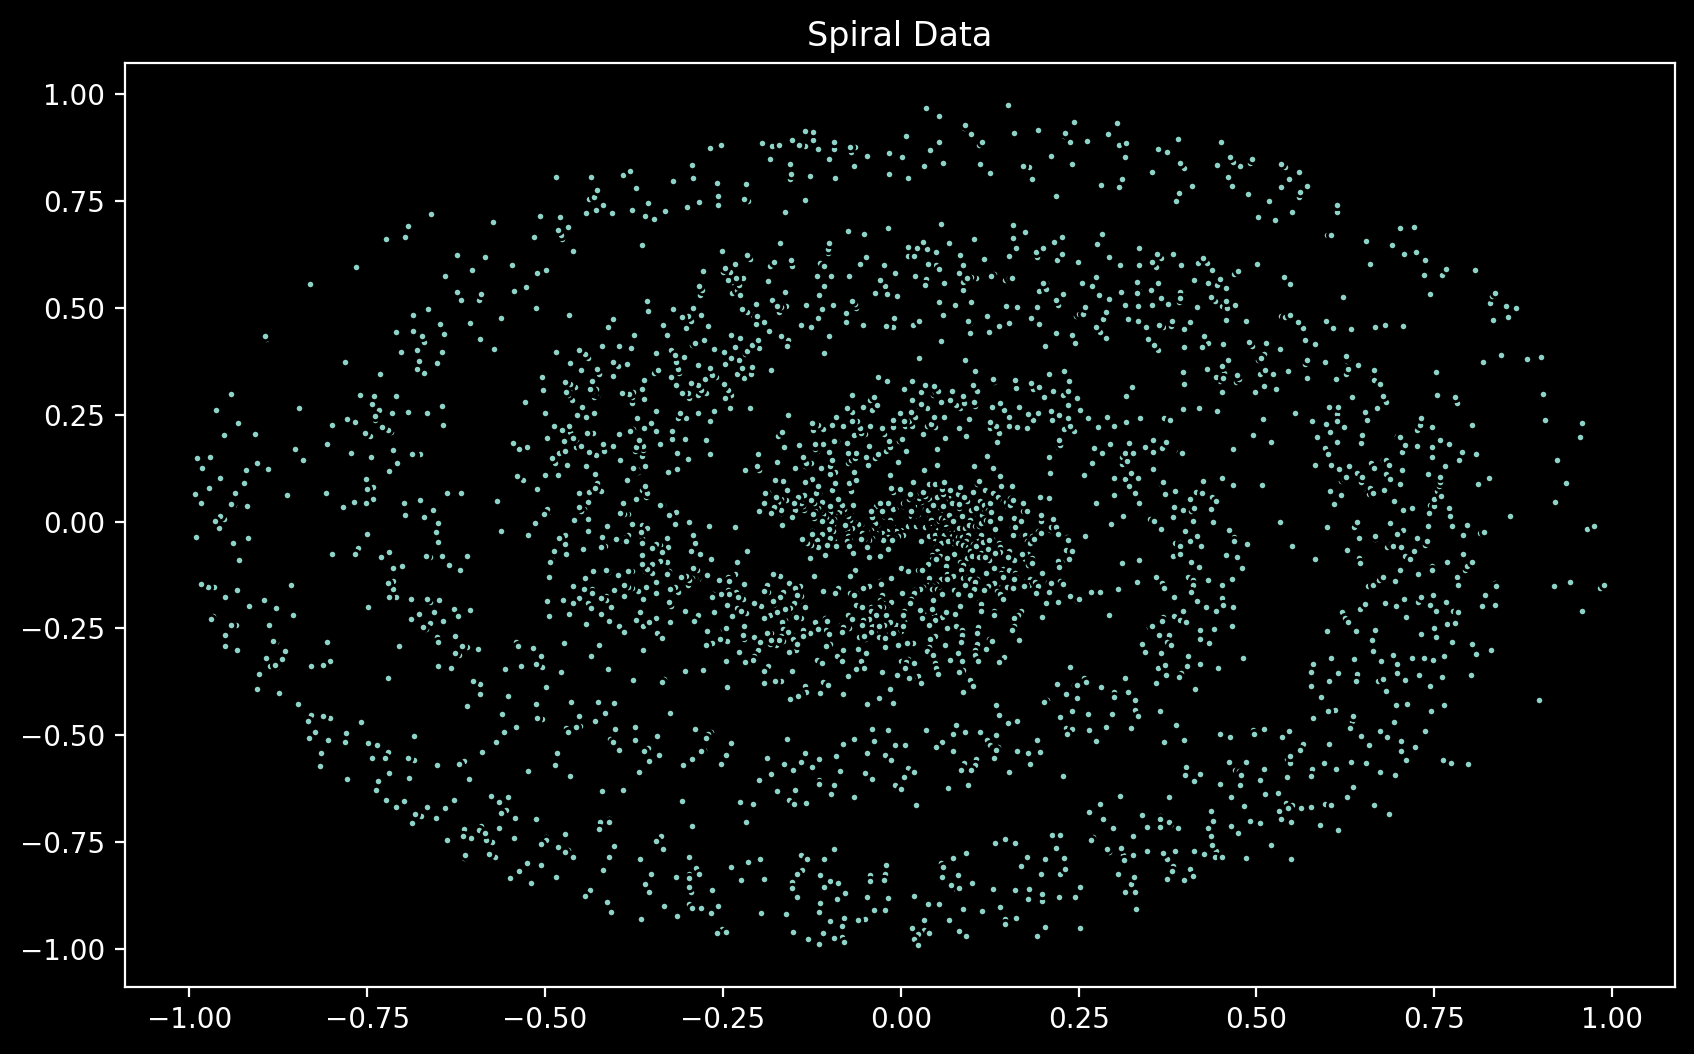

In [106]:
plt.figure(figsize=(10, 6))
X, y = spiral_data(samples=1000, classes=3)
plt.scatter(X[:, 0], X[:, 1], cmap="brg", marker='.', edgecolors="k")
plt.title("Spiral Data")

Plotting with classification

Text(0.5, 1.0, 'Spiral Data')

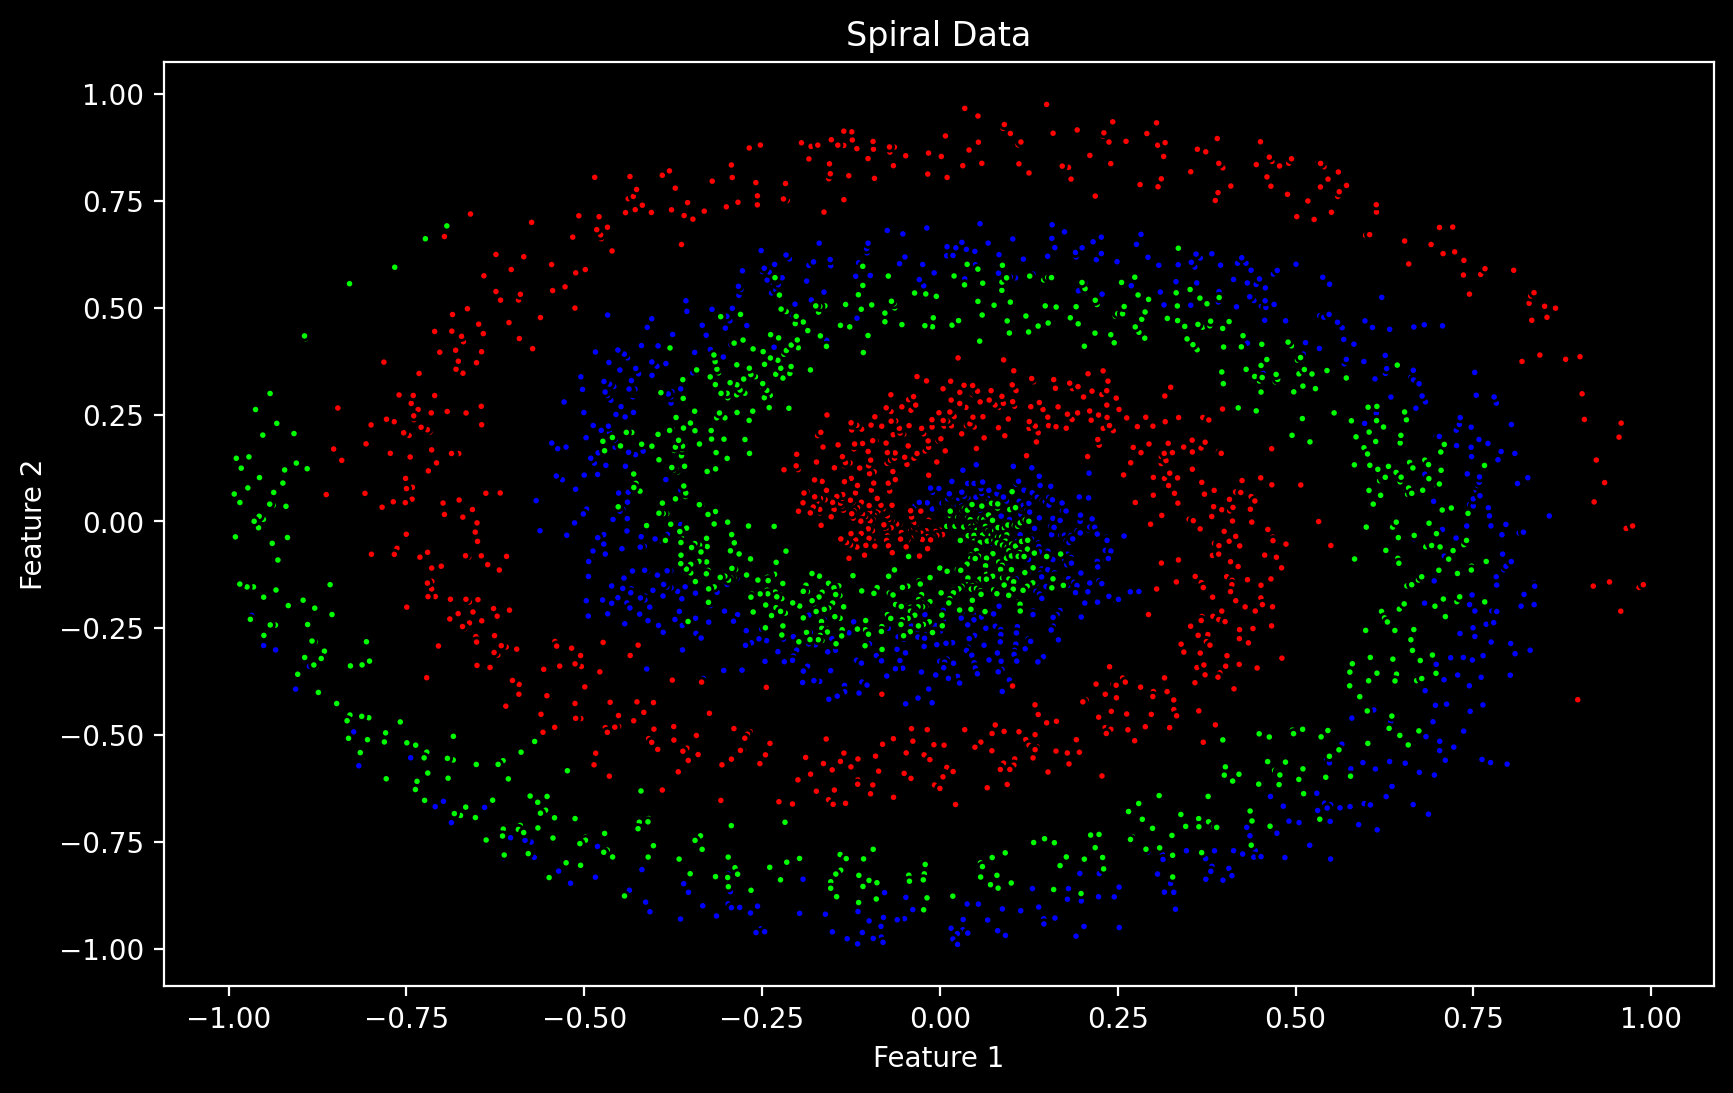

In [107]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker='.', edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Spiral Data")

In [108]:
nnfs.init()

In [109]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.ones((1, n_neurons))

    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

In [110]:
m, n = X.shape
m, n

(3000, 2)

In [111]:
layer_1 = Layer_Dense(n, 5)
layer_1.forward(X)
print(layer_1.output.shape)
layer_2 = Layer_Dense(5, 3)
layer_2.forward(layer_1.output)
print(layer_2.output.shape)
layer_3 = Layer_Dense(3, 4)
layer_3.forward(layer_2.output)
print(layer_3.output.shape)
output_layer = Layer_Dense(4, 1)
output_layer.forward(layer_3.output)
print(output_layer.output.shape)
print("First 5 outputs of the final layer:")
print(output_layer.output[:5])

(3000, 5)
(3000, 3)
(3000, 4)
(3000, 1)
First 5 outputs of the final layer:
[[0.99417874]
 [0.99417874]
 [0.99417874]
 [0.99417874]
 [0.99417874]]


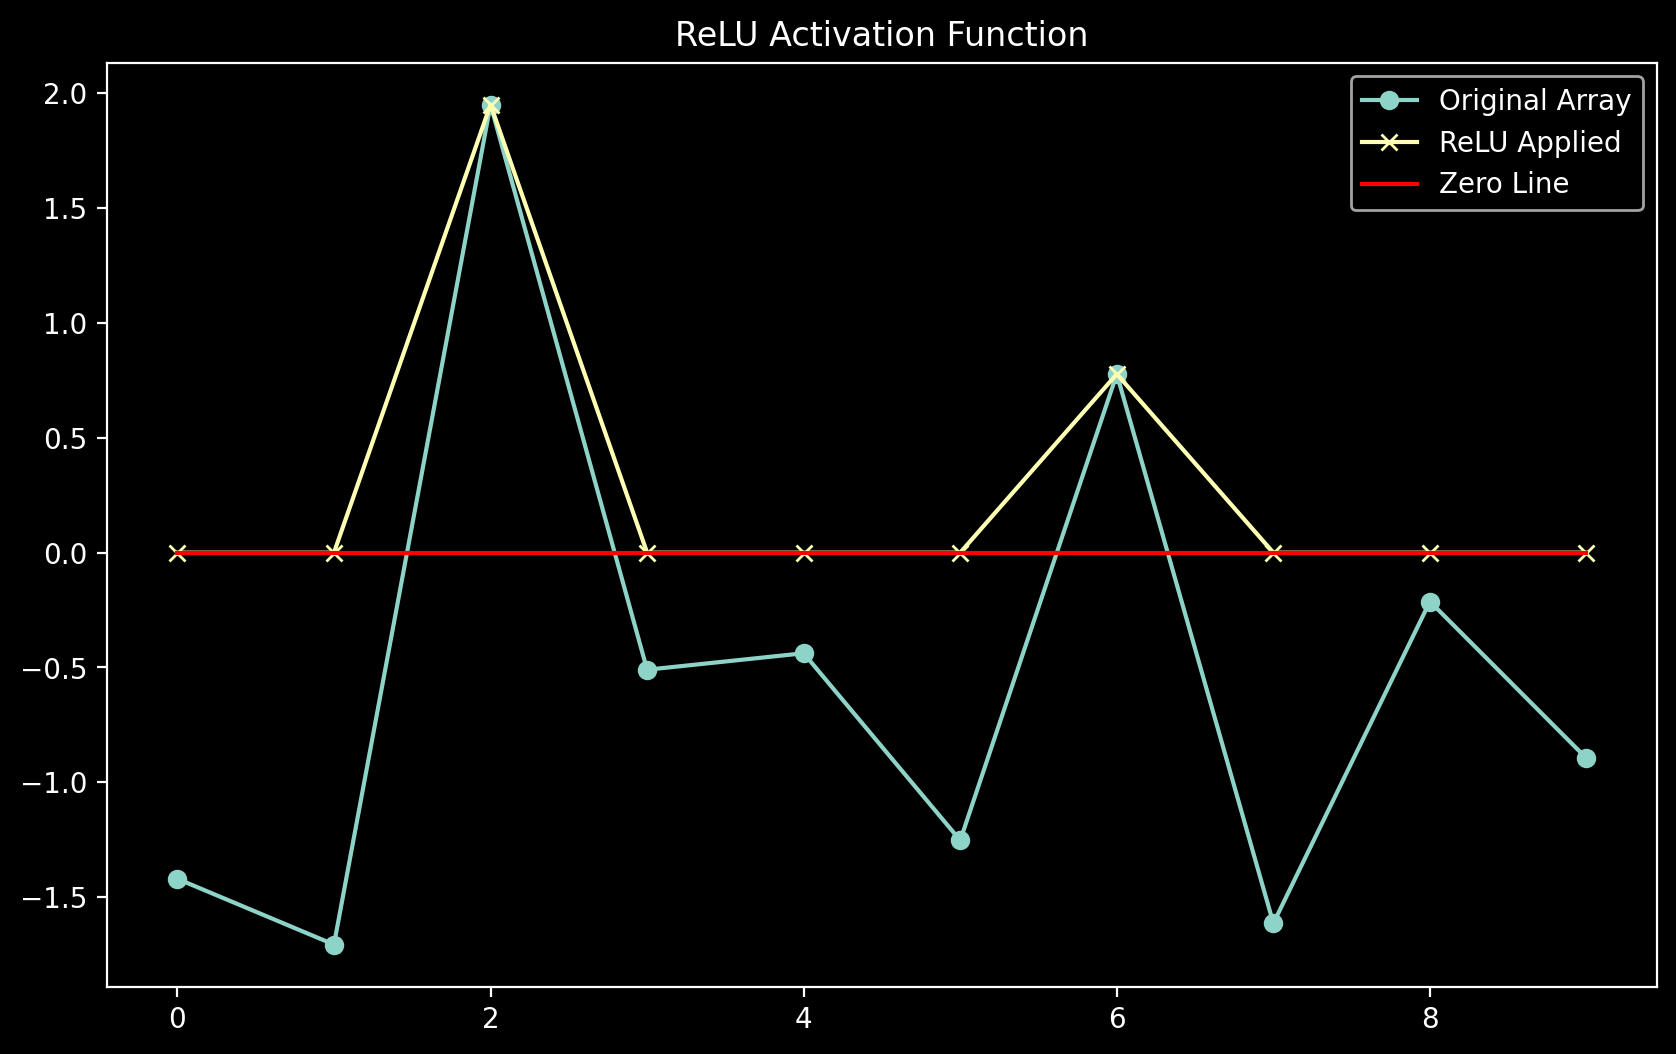

In [112]:
array = np.random.randn(10).astype(np.float64)
reLued_array = np.maximum(0, array)
plt.figure(figsize=(10, 6))
plt.plot(array, label='Original Array', marker='o')
plt.plot(reLued_array, label='ReLU Applied', marker='x')
plt.plot(np.zeros_like(array), label='Zero Line', linestyle='-', c='r')
plt.title("ReLU Activation Function")
plt.legend()

array([0.00000e+00, 5.00005e-05, 1.00001e-04, ..., 4.99990e+00,
       4.99995e+00, 5.00000e+00], shape=(100000,))

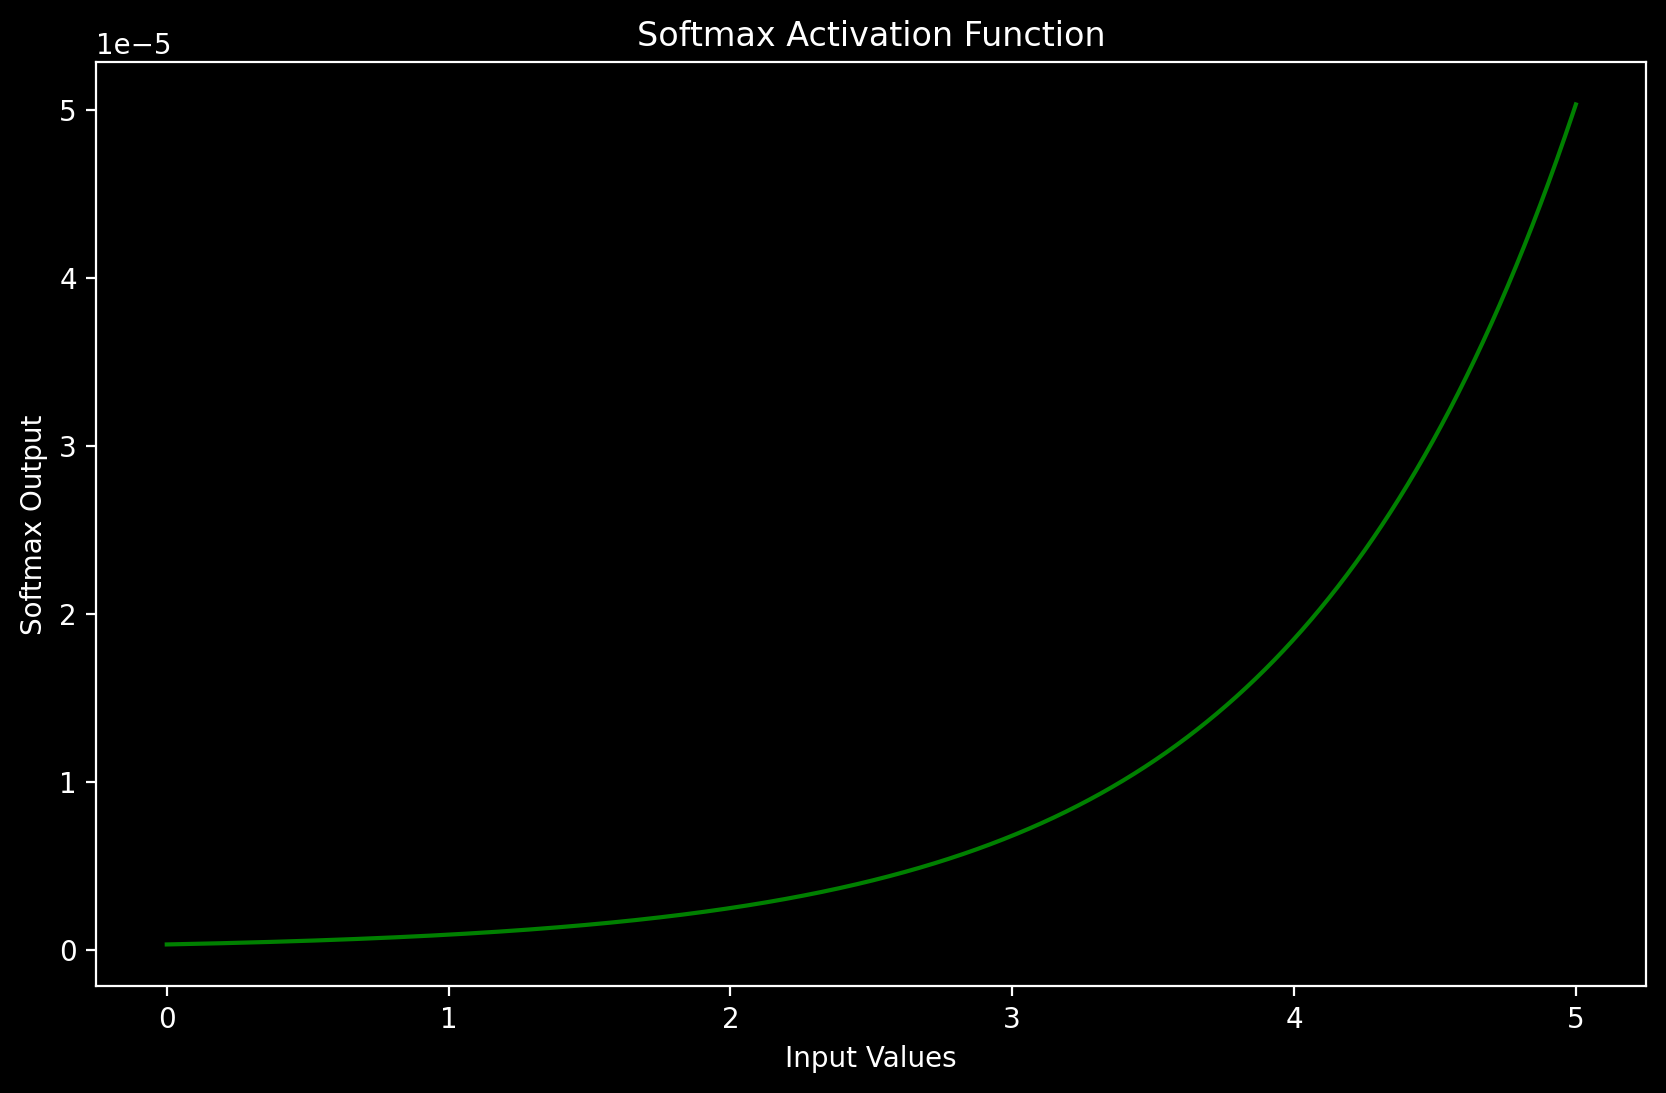

In [113]:
plt.figure(figsize=(10, 6))
x_values = np.linspace(0, 5, 100000)
y_values = np.exp(x_values) / np.sum(np.exp(x_values))
plt.plot(x_values, y_values, c='g')
plt.title("Softmax Activation Function")
plt.xlabel("Input Values")
plt.ylabel("Softmax Output")
x_values

In [114]:
class relu_Activation:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs, )
act = relu_Activation()
print("Original array:")
array = np.array([-2, -1, 0, 1, 2])
print(array)
act.forward(array)
print("ReLU applied:")
print(act.output)


Original array:
[-2 -1  0  1  2]
ReLU applied:
[0 0 0 1 2]


In [115]:
class softmax_Activation:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True)) # keeps numerical stability by making sure the largest number is 0
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True) # keepdims keeps the array 2D
        self.output = probabilities

In [116]:
X, y = spiral_data(samples=100, classes=3)

pipeline = [
    Layer_Dense(2, 5),
    relu_Activation(),
    Layer_Dense(5, 3),
    softmax_Activation()
]

final_output = []

for layer in pipeline: 
    layer.forward(X)
    X = layer.output
    final_output.append(X)
final_output = final_output[-1]
print("Final output after softmax activation:")
print(final_output[:3])

Final output after softmax activation:
[[0.33223391 0.33308949 0.33467661]
 [0.33223407 0.33308887 0.33467706]
 [0.33223414 0.33308833 0.33467752]]


___
Now that we have created dense layers and activation functions, we must also choose a loss function and optimise it. For classification problems with more than 2 class targets, a very commonly used loss function is the Categorical Cross Entropy function. What that does is, it gives us a probability vector of all the classes available and from there we can see which of the classes the model thinks the current data point most likely is. The formula it uses to calculate the loss is: <br>
\-∑ y_true*log(y_pred) <br>
Here's a visual representation of the y=-log(x) function:
___

C:\Users\Rick\AppData\Local\Temp\ipykernel_2028\2857922402.py:3: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(x_axis)


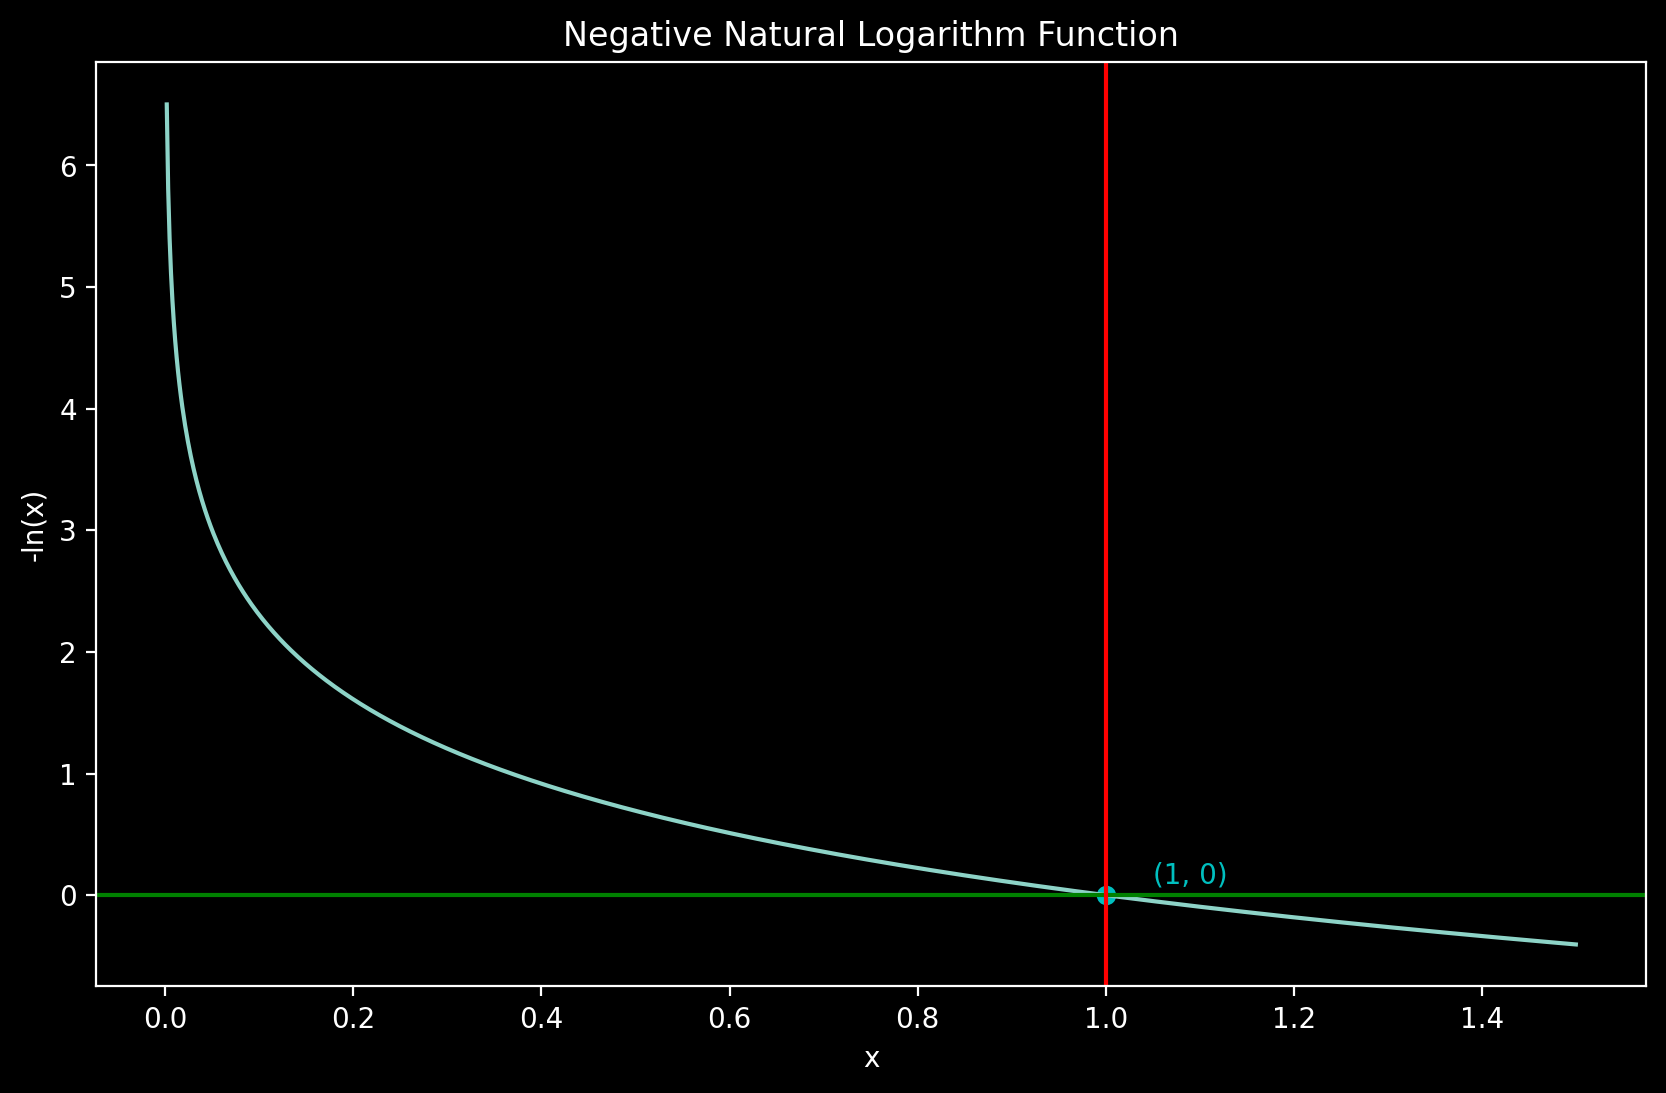

In [117]:
plt.figure(figsize=(10, 6))
x_axis = np.linspace(0, 1.5, 1000, True)
y_axis = -np.log(x_axis)
plt.plot(x_axis, y_axis)
plt.title("Negative Natural Logarithm Function")
plt.xlabel("x")
plt.ylabel("-ln(x)")
plt.axhline(0, color='g', linestyle='-')
plt.scatter(1, 0, color='c')
plt.axvline(1, color='r', linestyle='-')
plt.text(1.05, 0.1, "(1, 0)", color='c')
plt.show()

We can clearly see that the closer our predicted probability of a certain data point belonging to a certain class is to 1, the closer our error gets to 0, given obviously that our model assigns the highest proability to the right class.

___
With classification problems we're faced with two types of representation when it comes to class targets. <br>
<ol>1. Class targets are just numbers.</ol>
<ol>2. Class targets are one-hot encoded.</ol>

When comes to the first one, that is class targets are just numbers, we do something called clever indexing in python. What that does is create a new array with elements that are strategically picked from a 2d array based on the indices provided. <br>
```matrix[[0, 1, 2], [1, 2, 1]]```
<br> This would return a new array of elements at (0,1), (1,2) and (2,1) from the matrix.<br>
___

Here's how to deal with the first problem:

In [118]:
example_outputs = np.array([[0.7, 0.2, 0.1],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])
correct_class_labels = np.array([0, 1, 1])
selected_confidences = example_outputs[range(len(example_outputs)), correct_class_labels]
print("Selected class confidences:")
print(selected_confidences)
error = -np.log(selected_confidences)
mean_error = np.mean(error)
print("Cross-entropy loss for each sample:")
print(error)
print("Mean cross-entropy loss:")
print(mean_error)

Selected class confidences:
[0.7 0.5 0.9]
Cross-entropy loss for each sample:
[0.35667494 0.69314718 0.10536052]
Mean cross-entropy loss:
0.38506088005216804


For one-hot encoded problems:

In [119]:
class_targets_1hot = np.array([[1, 0, 0],
                              [0, 1, 0],
                            [0, 1, 0]])
selected_confidences_1hot = np.sum(example_outputs * class_targets_1hot, axis=1)
print("Selected class confidences using one-hot encoding:")
print(selected_confidences_1hot)
print("Cross-entropy loss for each sample using one-hot encoding:")
error_1hot = -np.log(selected_confidences_1hot)
print(error_1hot)
mean_error_1hot = np.mean(error_1hot)
print("Mean cross-entropy loss using one-hot encoding:")
print(mean_error_1hot)

Selected class confidences using one-hot encoding:
[0.7 0.5 0.9]
Cross-entropy loss for each sample using one-hot encoding:
[0.35667494 0.69314718 0.10536052]
Mean cross-entropy loss using one-hot encoding:
0.38506088005216804


___
Common loss class: 

In [120]:
class Loss :
    def calculate(self, outputs, y_true):
        sample_losses = self.forward(outputs, y_true)
        data_loss = np.mean(sample_losses)
        return data_loss

In [121]:
class CategoricalCrossEntropy_Loss (Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        if len(y_true.shape) == 1: # class targets are just numbers
            correct_confidences = y_pred_clipped[
                range(samples), 
                y_true]
        elif len(y_true.shape) == 2: # one-hot encoded class targets
            correct_confidences = np.sum(
                y_pred_clipped * y_true, 
                axis=1)
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
    def backward (self, dOutputs, y_true) :
        samples = len(y_true)
        labels = len(dOutputs[0])
        if (y_true.shape == 1) :
            y_true = np.eye(labels)[y_true]
        self.dCost = - y_true/ dOutputs
        return self.dCost

In [122]:
#using the same example outputs as before for an illustration
loss_function = CategoricalCrossEntropy_Loss()
loss = loss_function.calculate(example_outputs, correct_class_labels)
loss

np.float64(0.38506088005216804)

In [123]:
X, y = spiral_data(samples=10000, classes=3)

pipeline = [
    Layer_Dense(2, 5),
    relu_Activation(),
    Layer_Dense(5, 3),
    softmax_Activation()
]

final_output = []

for layer in pipeline: 
    layer.forward(X)
    X = layer.output
    final_output.append(X)
print("Final output after softmax activation:")
print(final_output[-1])

actual_outputs = final_output[-1]

loss_function = CategoricalCrossEntropy_Loss()
loss = loss_function.calculate(actual_outputs, y)

if np.ndim(y) == 1:
    predictions = np.argmax(actual_outputs, axis=1)
    accuracy = np.mean(predictions == y)
else:
    y_true = np.argmax(y, axis=1)
    predictions = np.argmax(actual_outputs, axis=1)
    accuracy = np.mean(predictions == y_true)

print(f"Loss: {loss}, Accuracy: {accuracy}")    

Final output after softmax activation:
[[0.33996119 0.3209844  0.33905441]
 [0.33996118 0.3209844  0.33905442]
 [0.33996117 0.32098441 0.33905442]
 ...
 [0.34002225 0.32089752 0.33908023]
 [0.34000629 0.32089852 0.33909518]
 [0.33997227 0.32090678 0.33912095]]
Loss: 1.0989564482447212, Accuracy: 0.3333333333333333


<h1>Optimization</h1>

___

Strategy 1: Randomly selecting weights and biases.

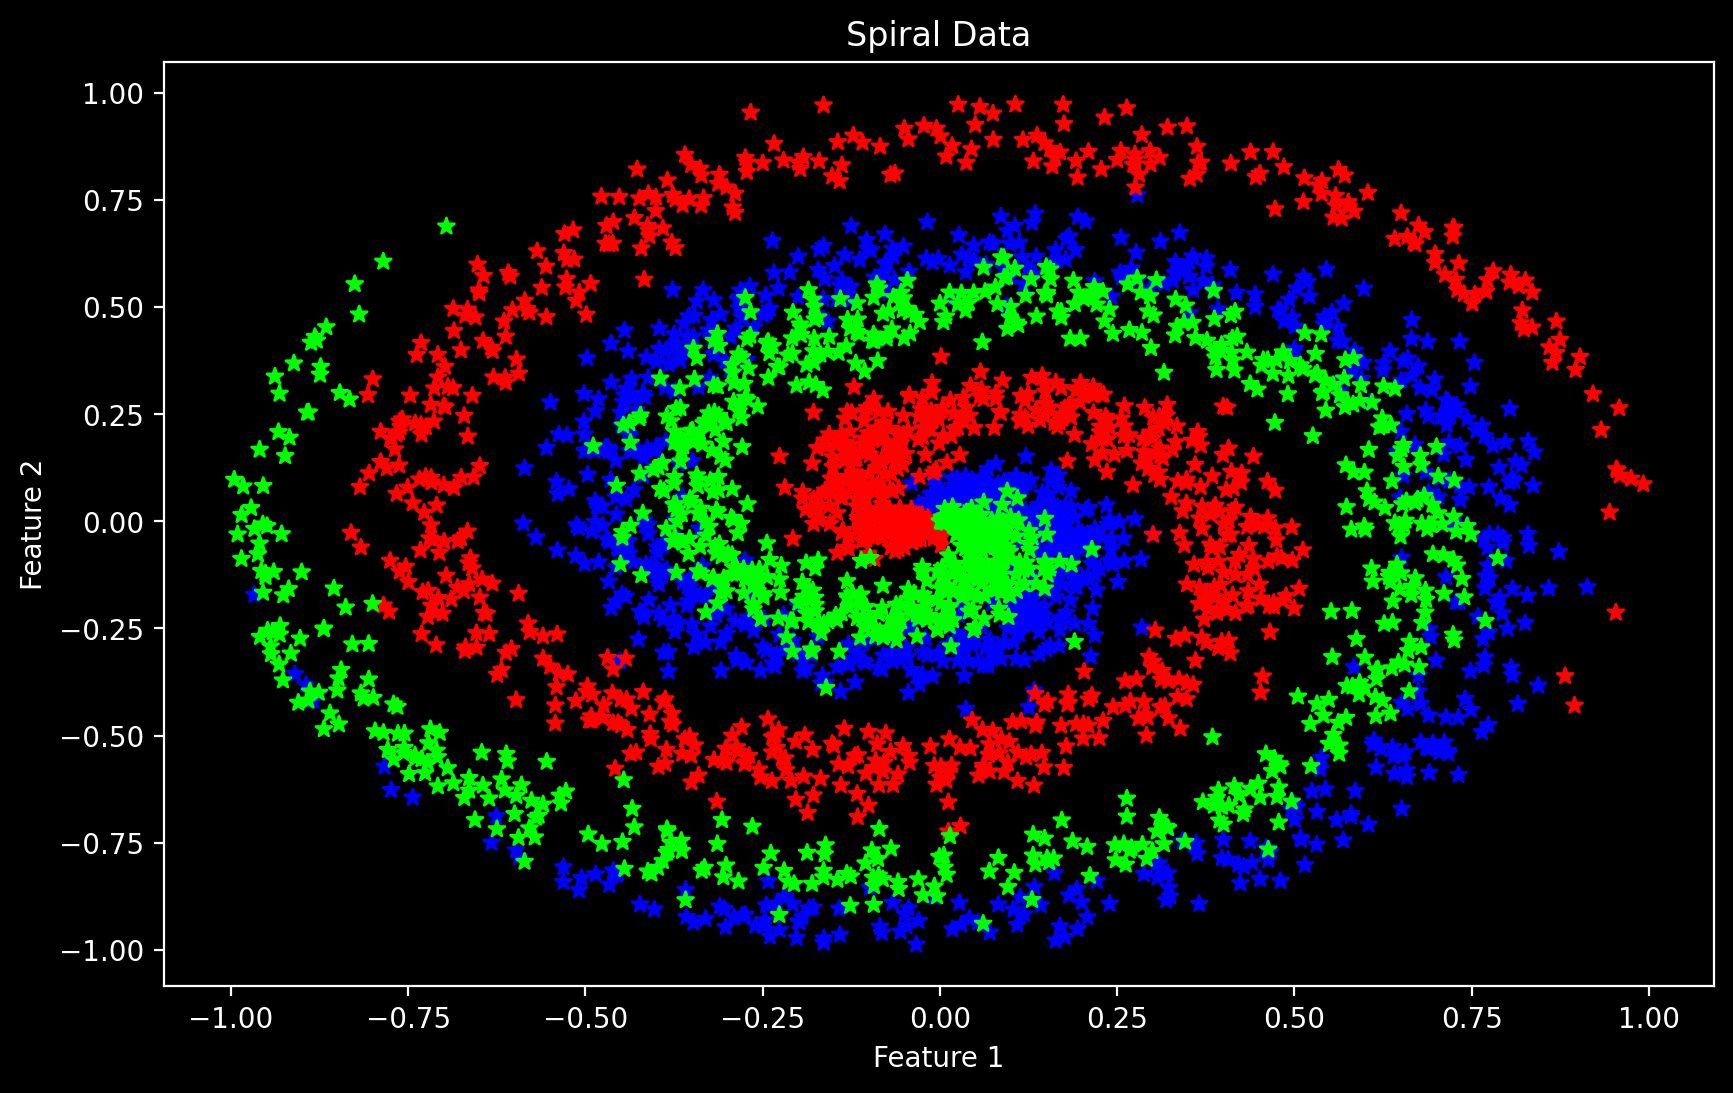

In [124]:
X, y = spiral_data(samples=1000, classes=3)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker='*')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Spiral Data")
plt.show()

<h2> Creating the neutal network :


In [125]:
# Layer 1 :5 units Dense layer with ReLU activation 
layer_1_dense = Layer_Dense(2, 5)
layer_1_dense.forward(X)
layer_1_activation = relu_Activation()
layer_1_activation.forward(layer_1_dense.output)
layer_1_output = layer_1_activation.output

# Layer 2 :3 units Dense layer with Softmax activation
layer_2_dense = Layer_Dense(5, 3)
layer_2_dense.forward(layer_1_output)
layer_2_activation = softmax_Activation()
layer_2_activation.forward(layer_2_dense.output)
layer_2_output = layer_2_activation.output

loss_function = CategoricalCrossEntropy_Loss()
loss1 = loss_function.calculate(layer_2_output, y)

Performing Optimization:


In [126]:
iterations = 10000
lowest_loss = 9999.99
best_dense1_weights = layer_1_dense.weights.copy()
best_dense1_biases = layer_1_dense.biases.copy()
best_dense2_weights = layer_2_dense.weights.copy()
best_dense2_biases = layer_2_dense.biases.copy()
all_weights_dense1 = []
all_weights_dense2 = []
all_weights_dense1.append(layer_1_dense.weights.copy())
all_weights_dense2.append(layer_2_dense.weights.copy())
all_losses = []
all_losses.append(loss1)



In [127]:
for iteration in range(iterations):
    layer_1_dense.weights = 0.05 * np.random.randn(2, 5)
    layer_1_dense.biases = 0.05 * np.random.randn(1, 5)
    layer_2_dense.weights = 0.05 * np.random.randn(5, 3)
    layer_2_dense.biases = 0.05 * np.random.randn(1, 3)
    # Forward pass
    layer_1_dense.forward(X)
    layer_1_activation.forward(layer_1_dense.output)
    layer_2_dense.forward(layer_1_activation.output)
    layer_2_activation.forward(layer_2_dense.output)
    layer_2_output = layer_2_activation.output
    #Storing weights for analysis
    all_weights_dense1.append(layer_1_dense.weights.copy())
    all_weights_dense2.append(layer_2_dense.weights.copy())
    # Loss calculation
    loss = loss_function.calculate(layer_2_output, y)
    all_losses.append(loss)
    if loss < lowest_loss:
        lowest_loss = loss
        best_dense1_weights = layer_1_dense.weights.copy()
        best_dense1_biases = layer_1_dense.biases.copy()
        best_dense2_weights = layer_2_dense.weights.copy()
        best_dense2_biases = layer_2_dense.biases.copy()
        print(f"New lowest loss: {lowest_loss} at iteration {iteration}")


New lowest loss: 1.0986417531967163 at iteration 0
New lowest loss: 1.0986292362213135 at iteration 15
New lowest loss: 1.0984917879104614 at iteration 23
New lowest loss: 1.0983115434646606 at iteration 136
New lowest loss: 1.0976380109786987 at iteration 353


In [128]:
all_weights_dense1 = np.array(all_weights_dense1)
all_weights_dense2 = np.array(all_weights_dense2)
all_losses = np.array(all_losses)

Text(0, 0.5, 'Loss')

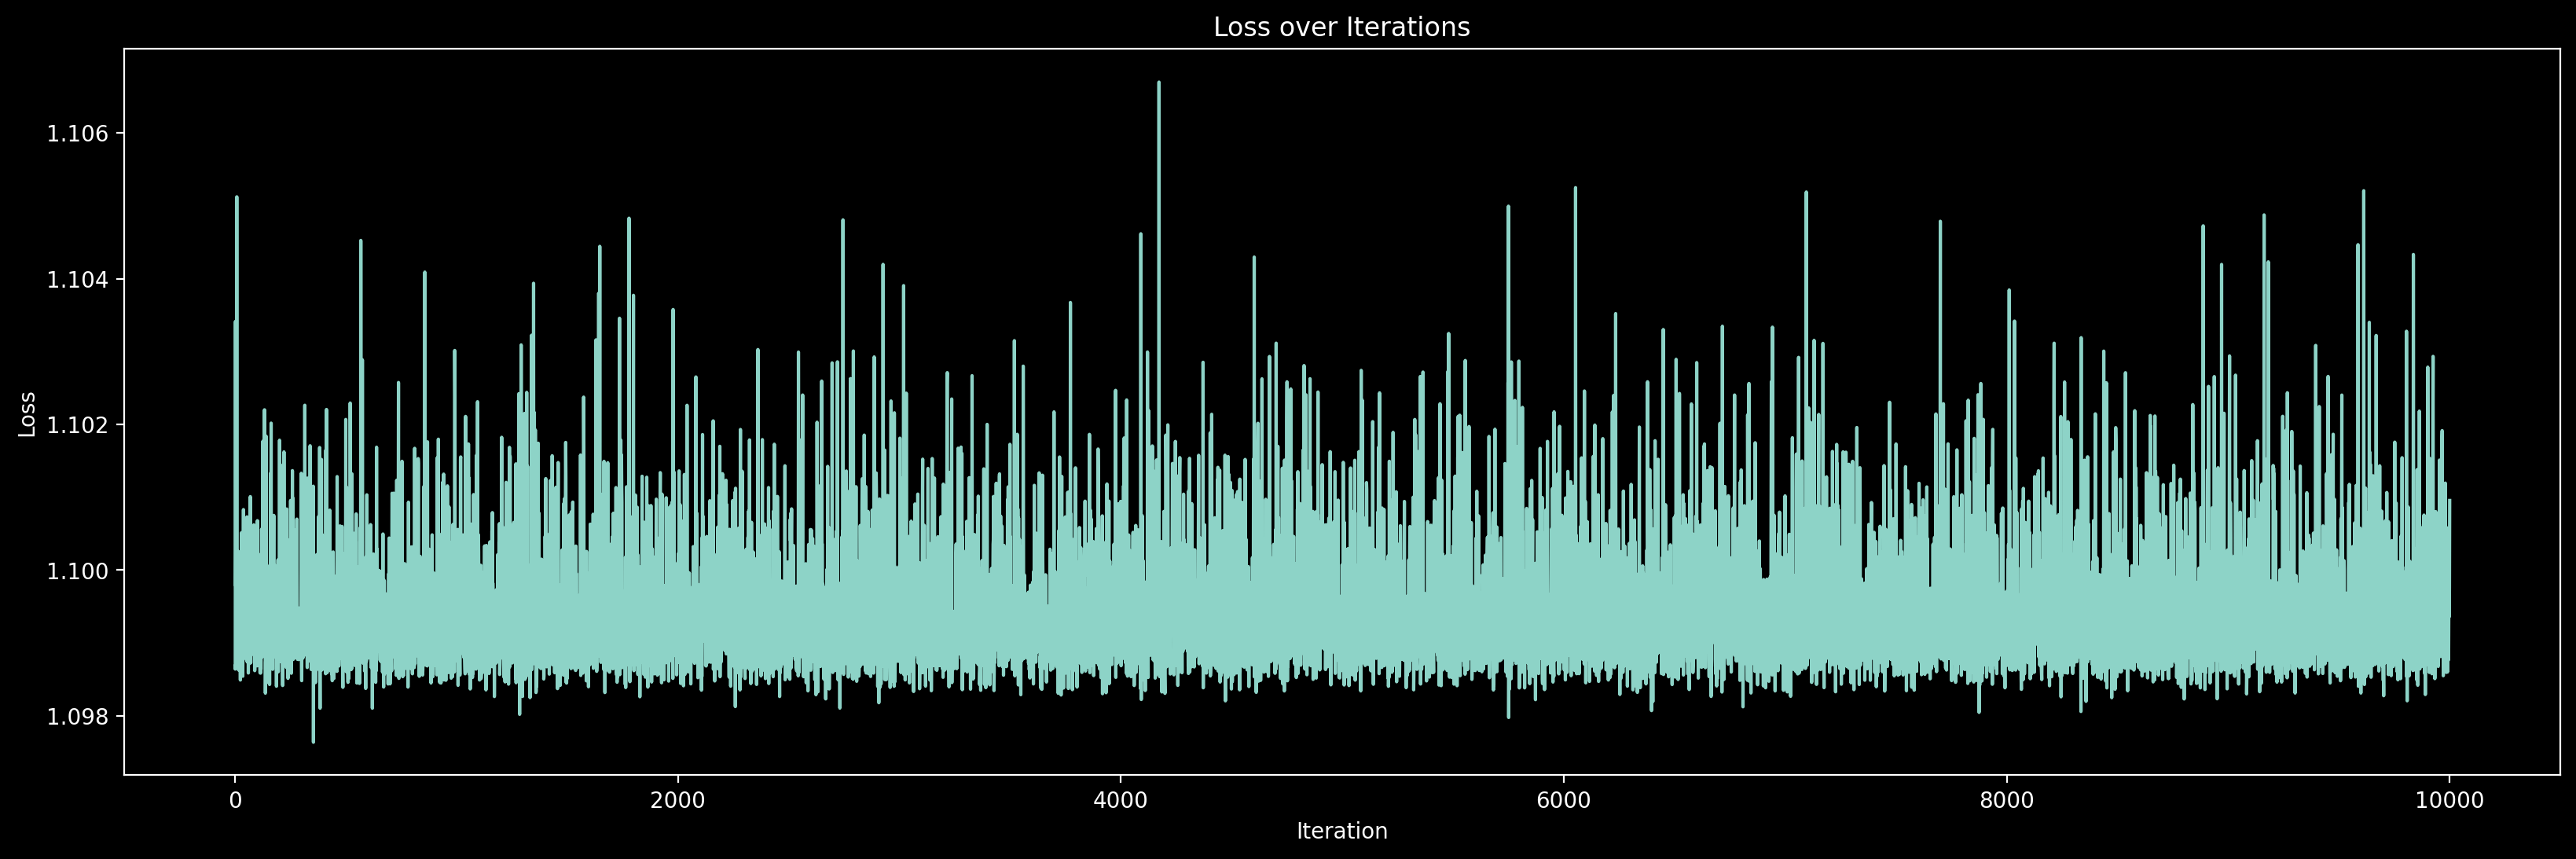

In [129]:
# plotting the loss over iterations
fig = plt.figure(figsize=(20, 6))
plt.plot(np.arange(len(all_losses)), all_losses)
plt.title("Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")

C:\Users\Rick\AppData\Local\Temp\ipykernel_2028\3100792796.py:12: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.multiarray.
  original_numpy_dot = np.core.multiarray.dot


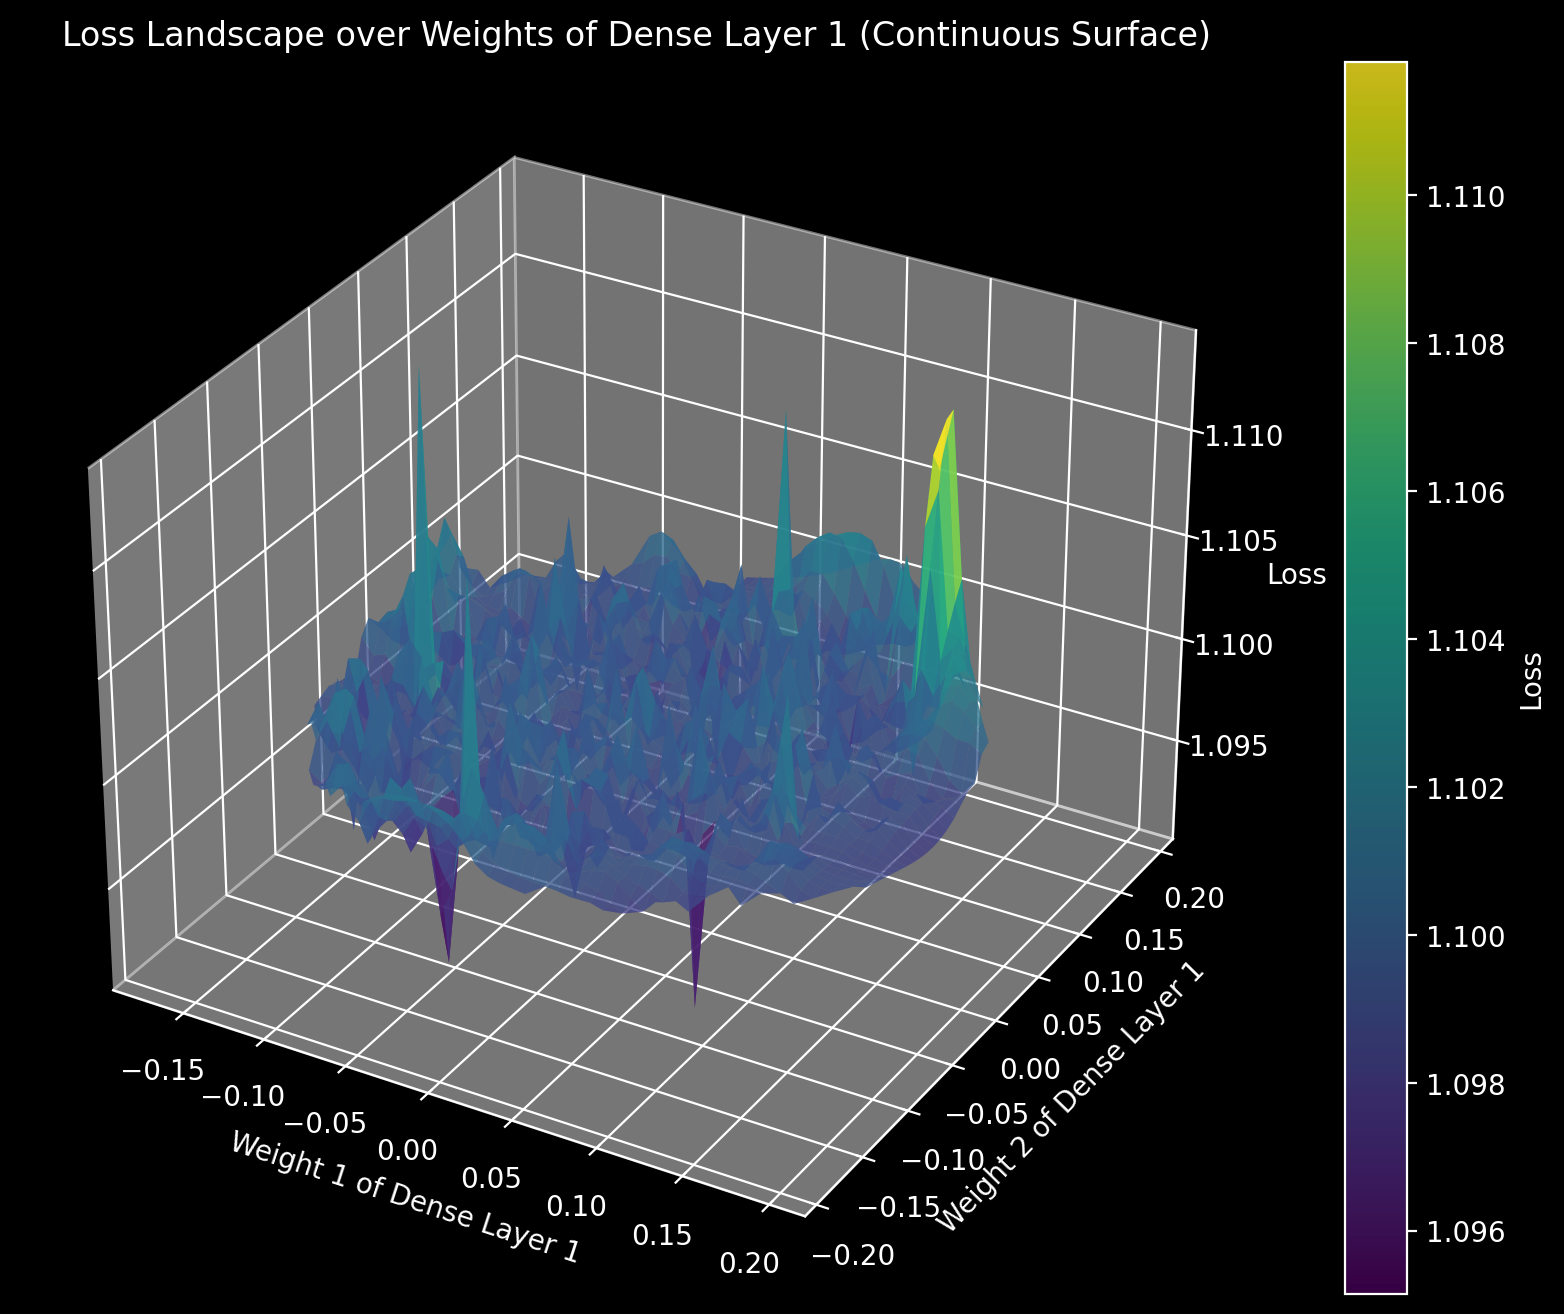

In [130]:
# 3d Plotting the loss for weights at each iteration - SURFACE PLOT
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np
import nnfs

# Store the nnfs-patched np.dot
nnfs_patched_np_dot = np.dot

# Get the original numpy.dot function from its internal source
original_numpy_dot = np.core.multiarray.dot

try:
    # Temporarily restore the original np.dot for plotting
    np.dot = original_numpy_dot

    all_weights_dense1 = np.array(all_weights_dense1)
    weights_dense1_x1 = all_weights_dense1[:, 0, 0].astype(np.float64)
    weights_dense1_x2 = all_weights_dense1[:, 0, 1].astype(np.float64)
    all_losses = np.array(all_losses, dtype=np.float64)

    # Create a regular grid for interpolation
    grid_x = np.linspace(weights_dense1_x1.min(), weights_dense1_x1.max(), 50)
    grid_y = np.linspace(weights_dense1_x2.min(), weights_dense1_x2.max(), 50)
    grid_X, grid_Y = np.meshgrid(grid_x, grid_y)
    
    # Interpolate Z values on the grid
    grid_Z = griddata((weights_dense1_x1, weights_dense1_x2), all_losses, 
                      (grid_X, grid_Y), method='cubic')

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot surface instead of scatter
    surf = ax.plot_surface(grid_X, grid_Y, grid_Z, cmap='viridis', alpha=0.8)
    
    fig.colorbar(surf, ax=ax, label='Loss')
    ax.set_xlabel('Weight 1 of Dense Layer 1')
    ax.set_ylabel('Weight 2 of Dense Layer 1')
    ax.set_zlabel('Loss')
    ax.set_title('Loss Landscape over Weights of Dense Layer 1 (Continuous Surface)')
    plt.show()

finally:
    # Restore the nnfs-patched np.dot
    np.dot = nnfs_patched_np_dot

C:\Users\Rick\AppData\Local\Temp\ipykernel_2028\1882138731.py:12: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.multiarray.
  original_numpy_dot = np.core.multiarray.dot


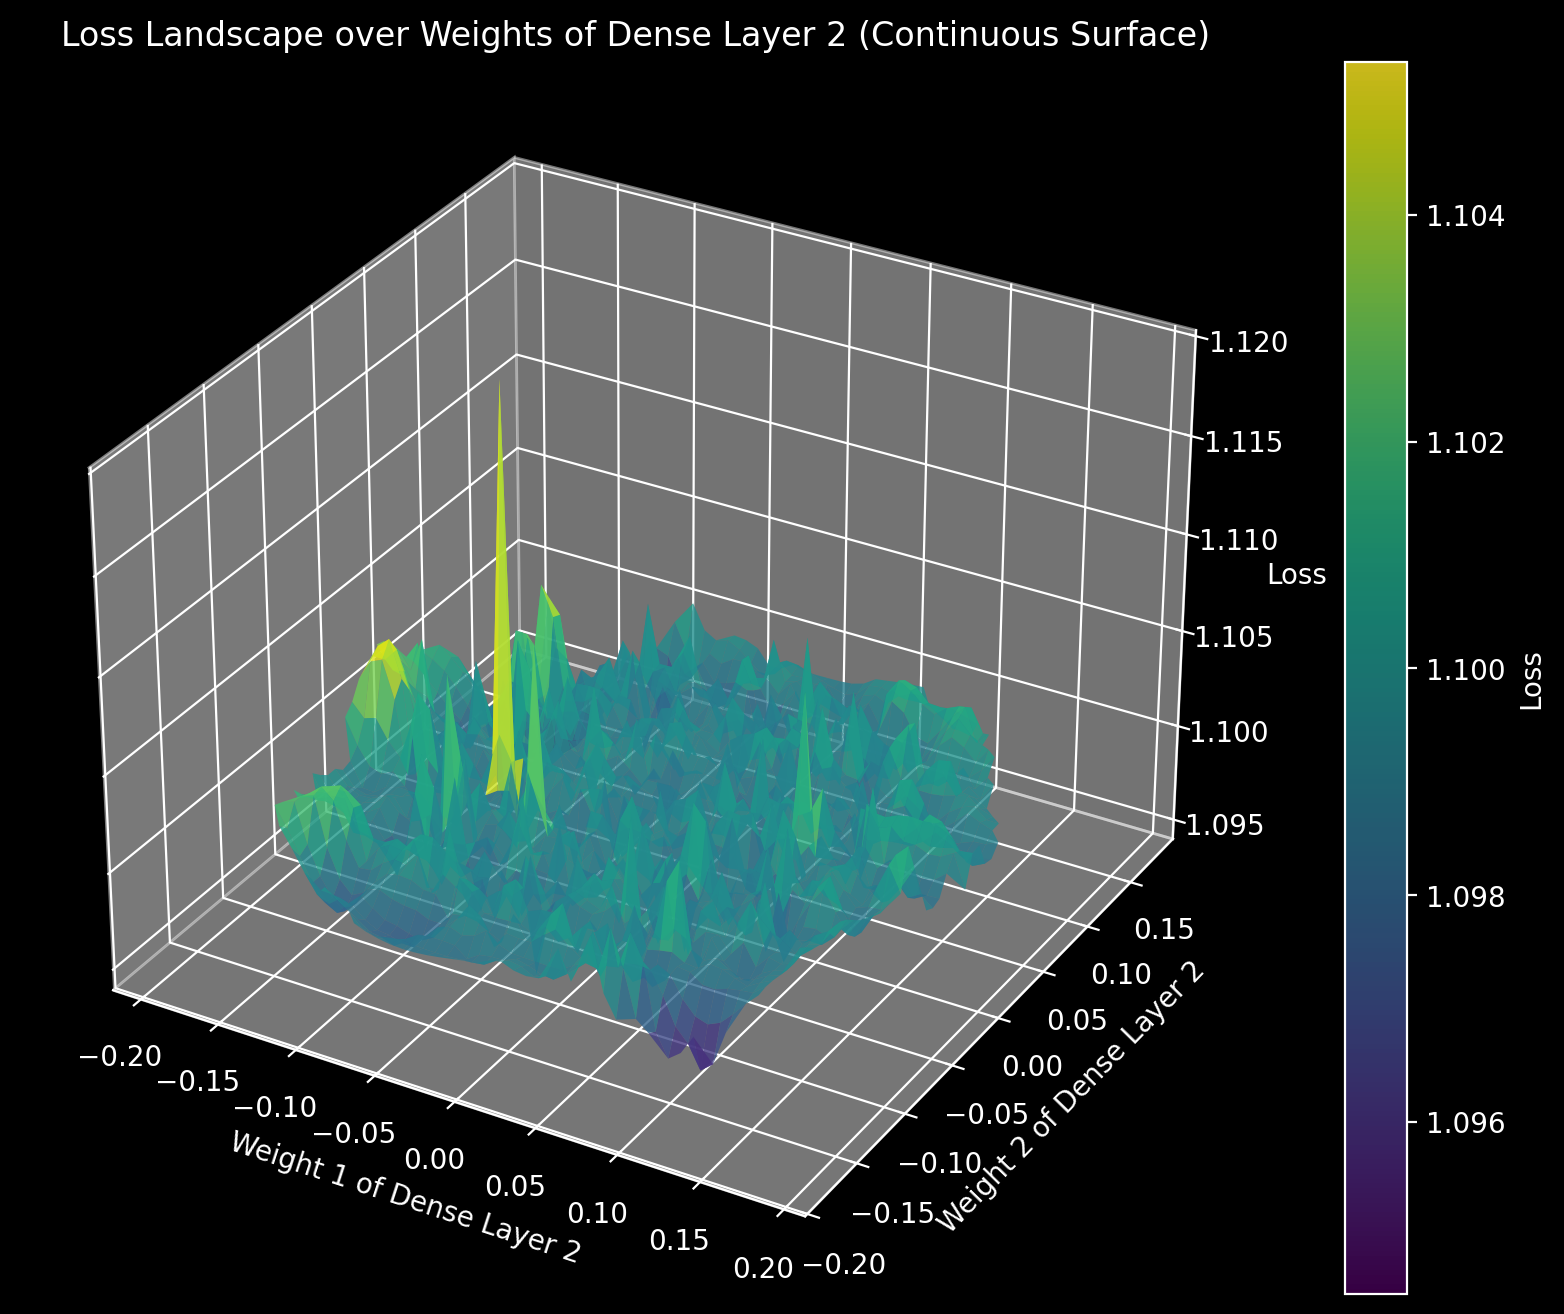

In [131]:
# 3d Plotting the loss for weights at each iteration - SURFACE PLOT
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np
import nnfs

# Store the nnfs-patched np.dot
nnfs_patched_np_dot = np.dot

# Get the original numpy.dot function from its internal source
original_numpy_dot = np.core.multiarray.dot

try:
    # Temporarily restore the original np.dot for plotting
    np.dot = original_numpy_dot

    all_weights_dense1 = np.array(all_weights_dense1)
    weights_dense2_x1 = all_weights_dense2[:, 0, 0].astype(np.float64)
    weights_dense2_x2 = all_weights_dense2[:, 0, 1].astype(np.float64)
    all_losses = np.array(all_losses, dtype=np.float64)

    # Create a regular grid for interpolation
    grid_x = np.linspace(weights_dense2_x1.min(), weights_dense2_x1.max(), 50)
    grid_y = np.linspace(weights_dense2_x2.min(), weights_dense2_x2.max(), 50)
    grid_X, grid_Y = np.meshgrid(grid_x, grid_y)
    
    # Interpolate Z values on the grid
    grid_Z = griddata((weights_dense2_x1, weights_dense2_x2), all_losses, 
                      (grid_X, grid_Y), method='cubic')

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot surface instead of scatter
    surf = ax.plot_surface(grid_X, grid_Y, grid_Z, cmap='viridis', alpha=0.8)
    
    fig.colorbar(surf, ax=ax, label='Loss')
    ax.set_xlabel('Weight 1 of Dense Layer 2')
    ax.set_ylabel('Weight 2 of Dense Layer 2')
    ax.set_zlabel('Loss')
    ax.set_title('Loss Landscape over Weights of Dense Layer 2 (Continuous Surface)')
    plt.show()

finally:
    # Restore the nnfs-patched np.dot
    np.dot = nnfs_patched_np_dot

Obviously, this is not a good strategy and it does not work.

For our next strategy we randomly adjust weights and biases.
<br> Let's start by creating the network again.

In [132]:
# Layer 1 :5 units Dense layer with ReLU activation 
layer_1_dense = Layer_Dense(2, 5)
layer_1_dense.forward(X)
layer_1_activation = relu_Activation()
layer_1_activation.forward(layer_1_dense.output)
layer_1_output = layer_1_activation.output

# Layer 2 :3 units Dense layer with Softmax activation
layer_2_dense = Layer_Dense(5, 3)
layer_2_dense.forward(layer_1_output)
layer_2_activation = softmax_Activation()
layer_2_activation.forward(layer_2_dense.output)
layer_2_output = layer_2_activation.output

loss_function = CategoricalCrossEntropy_Loss()
loss1 = loss_function.calculate(layer_2_output, y)
accuracy = np.mean(np.argmax(layer_2_output, axis=1) == y)

In [133]:
iterations = 10000
lowest_loss = 9999.99
best_dense1_weights = layer_1_dense.weights.copy()
best_dense1_biases = layer_1_dense.biases.copy()
best_dense2_weights = layer_2_dense.weights.copy()
best_dense2_biases = layer_2_dense.biases.copy()
all_weights_dense1 = []
all_weights_dense2 = []
all_weights_dense1.append(layer_1_dense.weights.copy())
all_weights_dense2.append(layer_2_dense.weights.copy())
all_losses = []
all_losses.append(loss1)


In [134]:
for iteration in range(iterations):
    layer_1_dense.weights += 0.05 * np.random.randn(2, 5)
    layer_1_dense.biases += 0.05 * np.random.randn(1, 5)
    layer_2_dense.weights += 0.05 * np.random.randn(5, 3)
    layer_2_dense.biases += 0.05 * np.random.randn(1, 3)
    # Forward pass
    layer_1_dense.forward(X)
    layer_1_activation.forward(layer_1_dense.output)
    layer_2_dense.forward(layer_1_activation.output)
    layer_2_activation.forward(layer_2_dense.output)
    layer_2_output = layer_2_activation.output
    #Storing weights for analysis
    all_weights_dense1.append(layer_1_dense.weights.copy())
    all_weights_dense2.append(layer_2_dense.weights.copy())
    # Loss calculation
    loss = loss_function.calculate(layer_2_output, y)
    all_losses.append(loss)
    if loss < lowest_loss:
        lowest_loss = loss
        best_dense1_weights = layer_1_dense.weights.copy()
        best_dense1_biases = layer_1_dense.biases.copy()
        best_dense2_weights = layer_2_dense.weights.copy()
        best_dense2_biases = layer_2_dense.biases.copy()
        accuracy = np.mean(np.argmax(layer_2_output, axis=1) == y)
        print(f"New lowest loss: {lowest_loss} at iteration {iteration}, Accuracy: {accuracy}")

    else :
        # Revert weights and biases if no improvement
        layer_1_dense.weights = best_dense1_weights.copy()
        layer_1_dense.biases = best_dense1_biases.copy()
        layer_2_dense.weights = best_dense2_weights.copy()
        layer_2_dense.biases = best_dense2_biases.copy()

New lowest loss: 1.105525174650868 at iteration 0, Accuracy: 0.3333333333333333
New lowest loss: 1.1053891526950366 at iteration 1, Accuracy: 0.3333333333333333
New lowest loss: 1.1011062876377267 at iteration 4, Accuracy: 0.3333333333333333
New lowest loss: 1.1008794928580832 at iteration 19, Accuracy: 0.3333333333333333
New lowest loss: 1.098925192409749 at iteration 20, Accuracy: 0.3333333333333333
New lowest loss: 1.0982286808068735 at iteration 23, Accuracy: 0.357
New lowest loss: 1.0955640867929137 at iteration 61, Accuracy: 0.3556666666666667
New lowest loss: 1.0947802034723508 at iteration 64, Accuracy: 0.33266666666666667
New lowest loss: 1.0935977385428144 at iteration 66, Accuracy: 0.348
New lowest loss: 1.0889992485331117 at iteration 70, Accuracy: 0.3536666666666667
New lowest loss: 1.088279755143261 at iteration 72, Accuracy: 0.364
New lowest loss: 1.087657946170326 at iteration 76, Accuracy: 0.37466666666666665
New lowest loss: 1.0859678988075656 at iteration 81, Accurac

Text(0, 0.5, 'Loss')

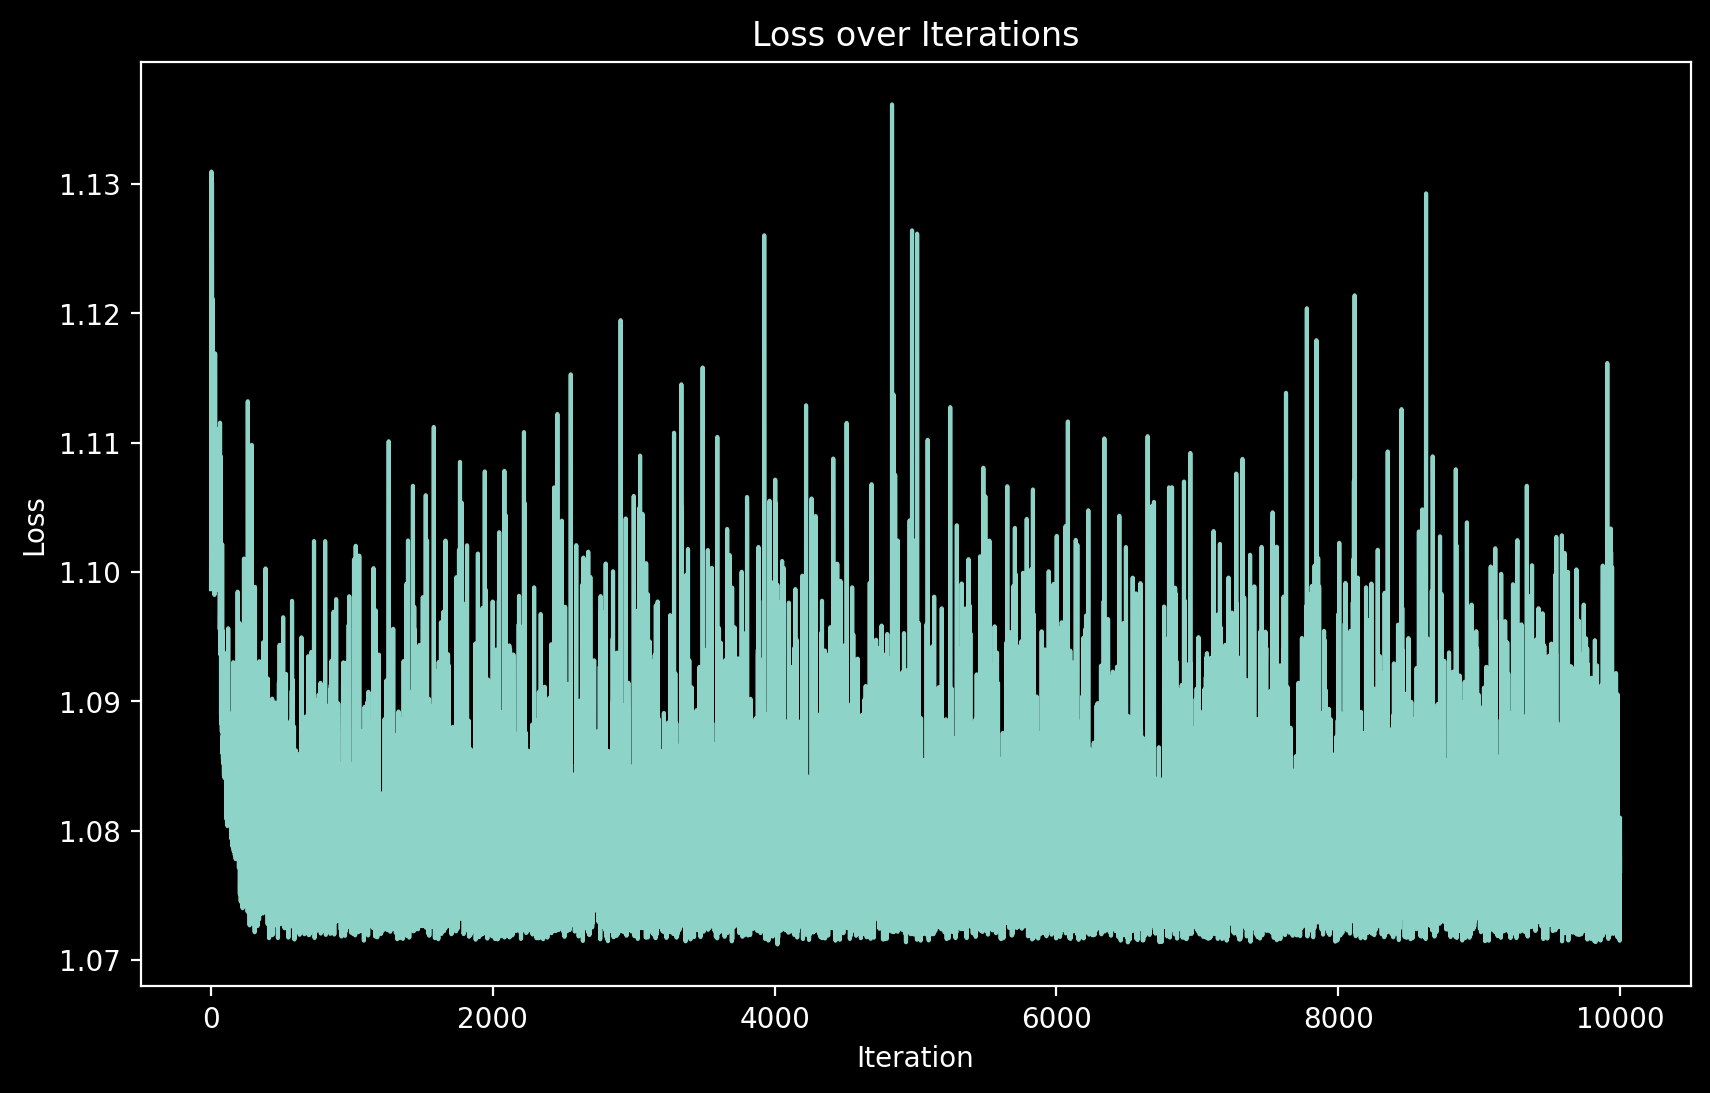

In [135]:
# plotting the loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(all_losses)), all_losses)
plt.title("Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")

C:\Users\Rick\AppData\Local\Temp\ipykernel_2028\1304793427.py:12: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.multiarray.
  original_numpy_dot = np.core.multiarray.dot


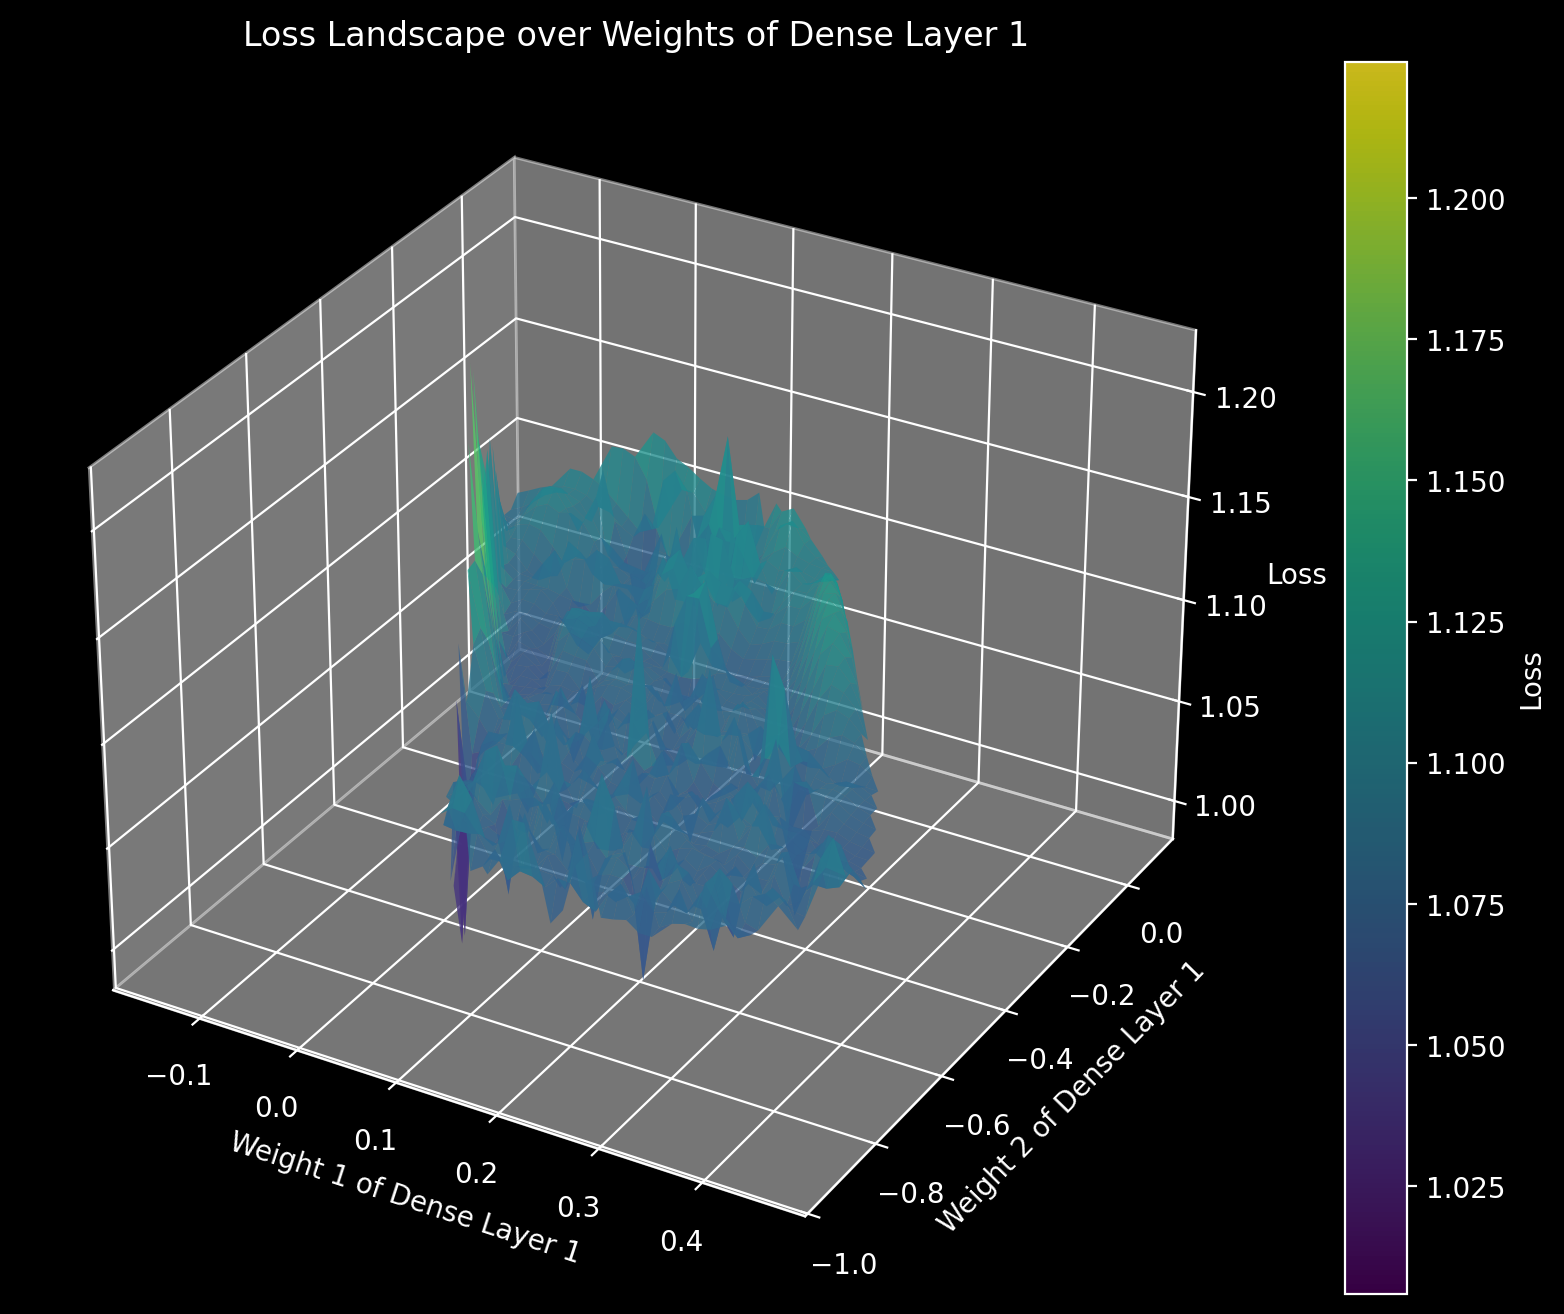

In [136]:
# 3d Plotting the loss for weights at each iteration - SURFACE PLOT
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np
import nnfs

# Store the nnfs-patched np.dot
nnfs_patched_np_dot = np.dot

# Get the original numpy.dot function from its internal source
original_numpy_dot = np.core.multiarray.dot

try:
    # Temporarily restore the original np.dot for plotting
    np.dot = original_numpy_dot

    all_weights_dense1 = np.array(all_weights_dense1)
    weights_dense1_x1 = all_weights_dense1[:, 0, 0].astype(np.float64)
    weights_dense1_x2 = all_weights_dense1[:, 0, 1].astype(np.float64)
    all_losses = np.array(all_losses, dtype=np.float64)

    # Create a regular grid for interpolation
    grid_x = np.linspace(weights_dense1_x1.min(), weights_dense1_x1.max(), 50)
    grid_y = np.linspace(weights_dense1_x2.min(), weights_dense1_x2.max(), 50)
    grid_X, grid_Y = np.meshgrid(grid_x, grid_y)
    
    # Interpolate Z values on the grid
    grid_Z = griddata((weights_dense1_x1, weights_dense1_x2), all_losses, 
                      (grid_X, grid_Y), method='cubic')

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot surface instead of scatter
    surf = ax.plot_surface(grid_X, grid_Y, grid_Z, cmap='viridis', alpha=0.8)
    
    fig.colorbar(surf, ax=ax, label='Loss')
    ax.set_xlabel('Weight 1 of Dense Layer 1')
    ax.set_ylabel('Weight 2 of Dense Layer 1')
    ax.set_zlabel('Loss')
    ax.set_title('Loss Landscape over Weights of Dense Layer 1')
    plt.show()

finally:
    # Restore the nnfs-patched np.dot
    np.dot = nnfs_patched_np_dot

C:\Users\Rick\AppData\Local\Temp\ipykernel_2028\3652564234.py:12: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.multiarray.
  original_numpy_dot = np.core.multiarray.dot


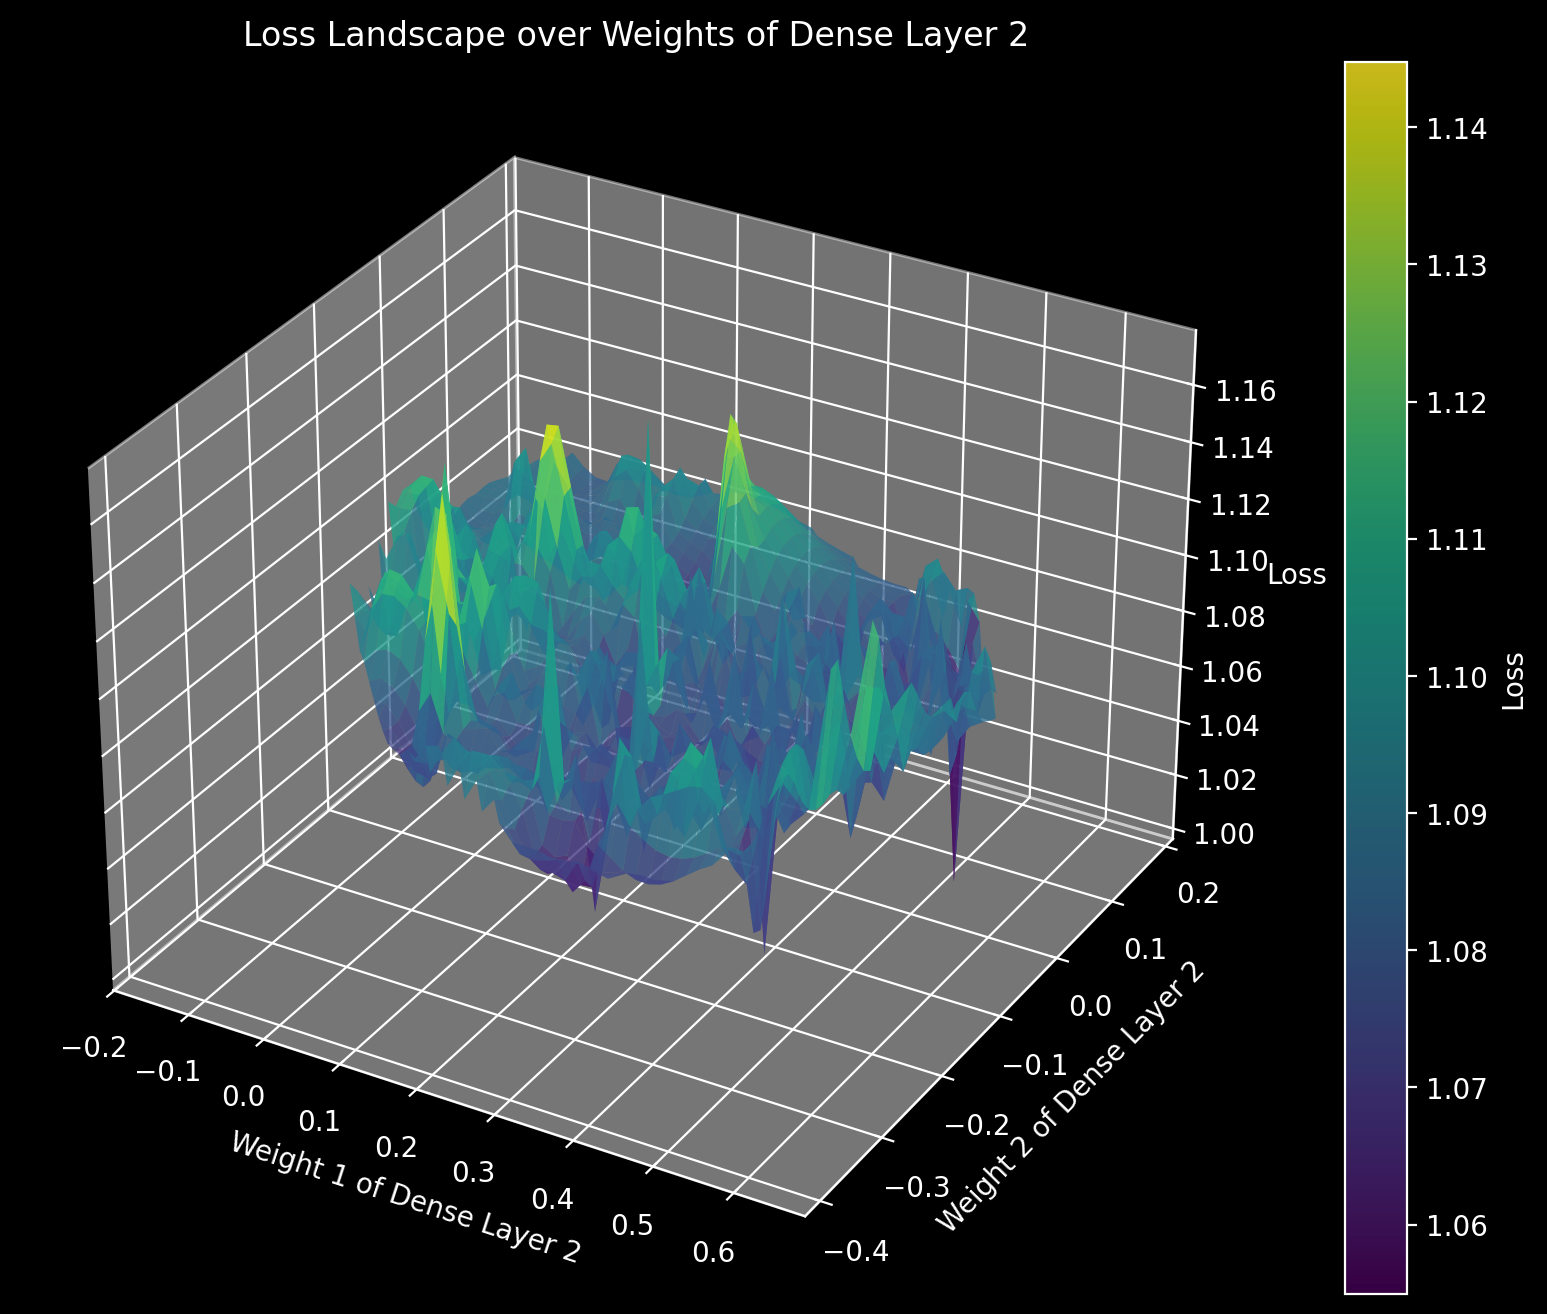

In [137]:
# 3d Plotting the loss for weights at each iteration - SURFACE PLOT
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np
import nnfs

# Store the nnfs-patched np.dot
nnfs_patched_np_dot = np.dot

# Get the original numpy.dot function from its internal source
original_numpy_dot = np.core.multiarray.dot

try:
    # Temporarily restore the original np.dot for plotting
    np.dot = original_numpy_dot

    all_weights_dense2 = np.array(all_weights_dense2)
    weights_dense2_x1 = all_weights_dense2[:, 0, 0].astype(np.float64)
    weights_dense2_x2 = all_weights_dense2[:, 0, 1].astype(np.float64)
    all_losses = np.array(all_losses, dtype=np.float64)

    # Create a regular grid for interpolation
    grid_x = np.linspace(weights_dense2_x1.min(), weights_dense2_x1.max(), 50)
    grid_y = np.linspace(weights_dense2_x2.min(), weights_dense2_x2.max(), 50)
    grid_X, grid_Y = np.meshgrid(grid_x, grid_y)
    
    # Interpolate Z values on the grid
    grid_Z = griddata((weights_dense2_x1, weights_dense2_x2), all_losses, 
                      (grid_X, grid_Y), method='cubic')

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot surface instead of scatter
    surf = ax.plot_surface(grid_X, grid_Y, grid_Z, cmap='viridis', alpha=0.8)

    fig.colorbar(surf, ax=ax, label='Loss')
    ax.set_xlabel('Weight 1 of Dense Layer 2')
    ax.set_ylabel('Weight 2 of Dense Layer 2')
    ax.set_zlabel('Loss')
    ax.set_title('Loss Landscape over Weights of Dense Layer 2')
    plt.show()

finally:
    # Restore the nnfs-patched np.dot
    np.dot = nnfs_patched_np_dot

This strategy definitely is not yet optimum but it does perform better than the previous one.

<h1>Backpropagation<br>

___

Before getting into backpropagation, we need to talk about gradient descent.


In [138]:
# Code for Backward Propagation in a single layer

weights = np.array([[0.2, 0.8, -0.5, 1.0, 0.5],
          [0.5, -0.91, 0.26, -0.5, 0.1],
          [-0.26, -0.27, 0.17, 0.87, 0.5]])
bias = np.array([2.0, 3.0, 0.5])
layer_outputs = []
inputs = np.array([[1, 2, 3, 4, 2.5],
                  [0.2, 0.8, -0.5, 1.0, 0.5],
                  [-0.26, -0.27, 0.17, 0.87, 0.5],
                  [0.5, -0.91, 0.26, -0.5, 0.1],
                  [3, 4, 2.5, 1, 2],
                  [2.5, 1, 2, 3, 4]])

targets = np.array([[2.5, 0.2, 0.44],
                    [1.0, 1.0, 0.73],
                    [0.5, 0.34, 0.23],
                    [1.5, 0.45, 0.12],
                    [2.0, 0.9, 0.56],
                    [1.3, 0.67, 0.89]])
all_losses = []
learning_rate = 0.001

def relu (x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.maximum(0, np.sign(x))

for iteration in range(500) :

    layer_outputs = relu(np.dot(inputs, weights.T) + bias)
    loss = np.mean((layer_outputs - targets) ** 2)
    all_losses.append(loss)
    # Backward pass
    dCost_dOutputs = 2 * (layer_outputs - targets) / targets.shape[0] # (6, 3)
    dOutputs_dLinear = relu_derivative(layer_outputs) # (6, 3)
    dCost_dLinear = dCost_dOutputs * dOutputs_dLinear # (6, 3)

    dCost_dWeights = np.dot(dCost_dLinear.T, inputs) # (3, 5)
    dCost_dBias = np.sum(dCost_dLinear, axis=0) # (3,)

    weights -= learning_rate * dCost_dWeights
    bias -= learning_rate * dCost_dBias


    if iteration % 10 == 0:
        print(f"Loss at iteration {iteration}, : {loss}")

print("Final weights after gradient descent:")
print(weights)
print("Final biases after gradient descent:")
print(bias)

Loss at iteration 0, : 8.940566540913913
Loss at iteration 10, : 5.598709719694821
Loss at iteration 20, : 3.820211569785835
Loss at iteration 30, : 2.8315316333592313
Loss at iteration 40, : 2.2726665723760044
Loss at iteration 50, : 1.9484484884059994
Loss at iteration 60, : 1.7526486133481123
Loss at iteration 70, : 1.6278534156474482
Loss at iteration 80, : 1.5429042546262037
Loss at iteration 90, : 1.4807417959245683
Loss at iteration 100, : 1.4319350757551215
Loss at iteration 110, : 1.391212567675938
Loss at iteration 120, : 1.3555909188611723
Loss at iteration 130, : 1.3233567619278008
Loss at iteration 140, : 1.293508263581602
Loss at iteration 150, : 1.2654468160238865
Loss at iteration 160, : 1.23880424521158
Loss at iteration 170, : 1.2133463509981026
Loss at iteration 180, : 1.1889171619130432
Loss at iteration 190, : 1.165407758580912
Loss at iteration 200, : 1.142737808526056
Loss at iteration 210, : 1.1208446146501965
Loss at iteration 220, : 1.0996771665333656
Loss at 

Text(0, 0.5, 'Loss')

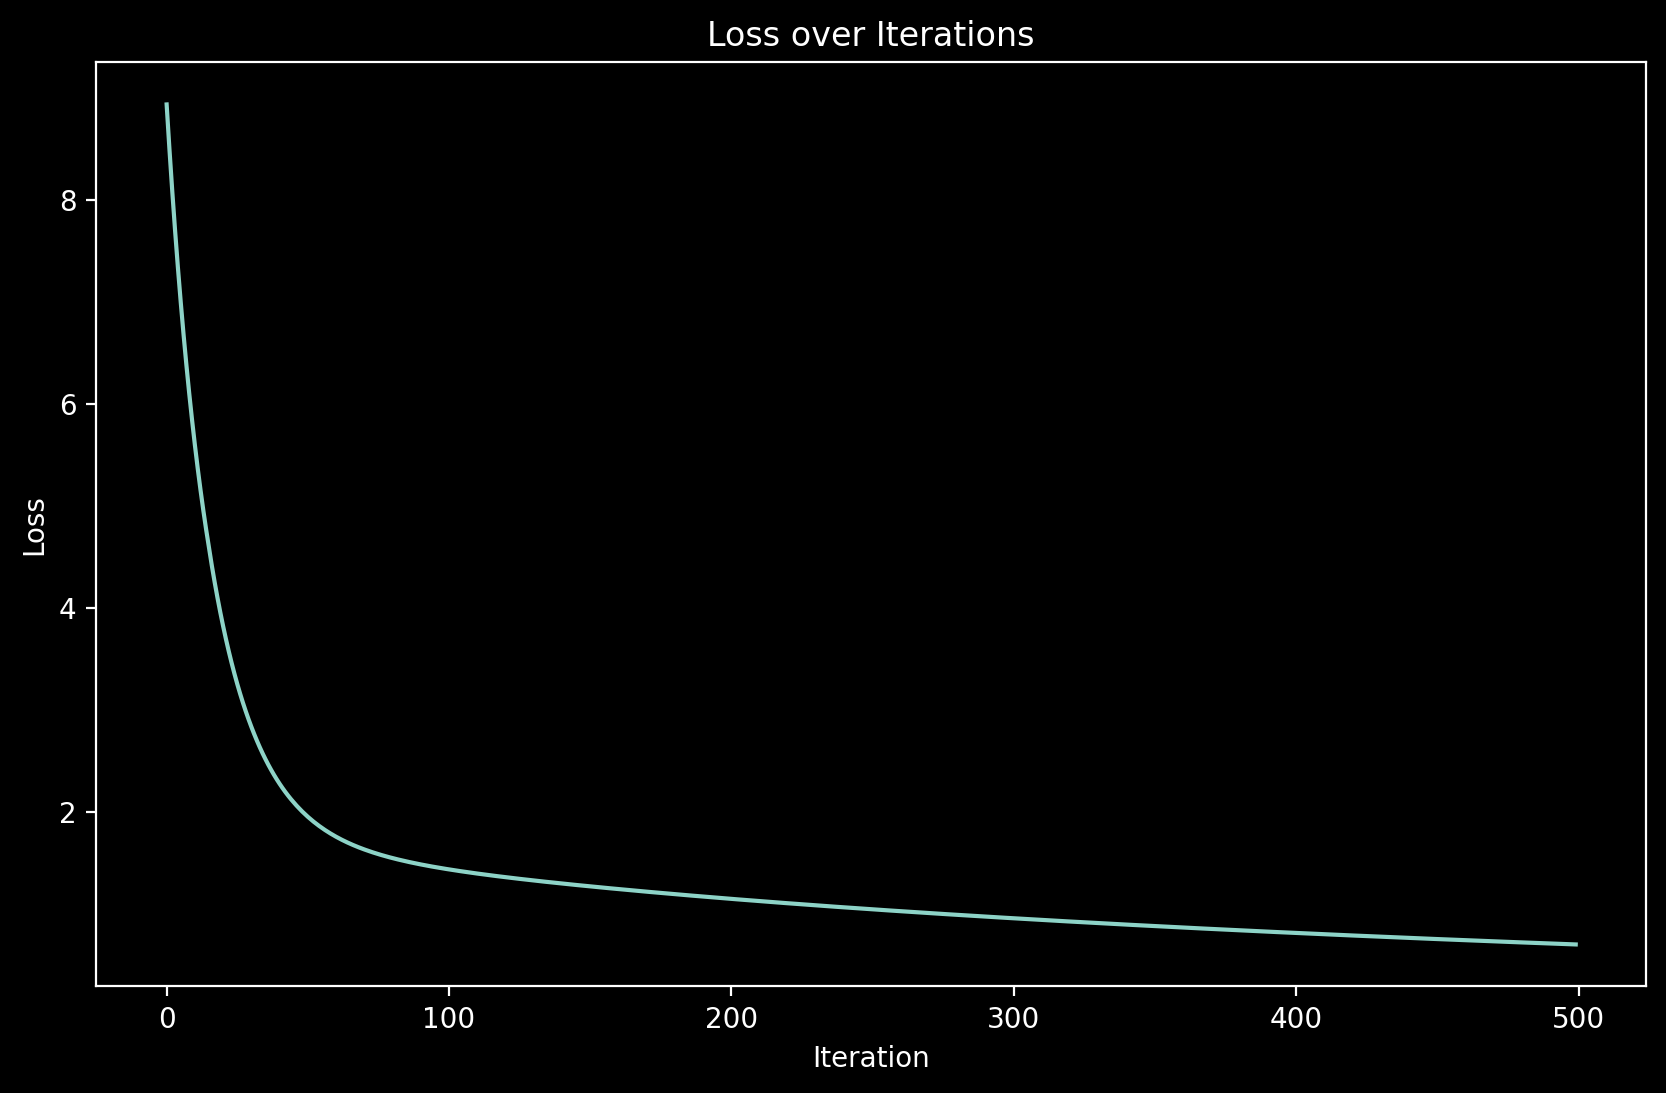

In [139]:
#plot loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(all_losses)), all_losses)
plt.title("Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")


As we can clearly see the loss is decreasing consistently and our algorithm is working. Now let's apply it on our actual model.

<p>Before that, we need to calculate the derivative for certain functions:
<br>
<ol> 1. Cross_entropy loss function (backprop updated in previous cell) </ol>
<ol> 2. Softmax function </o></p>

In [140]:
X, y = spiral_data(samples=1000, classes=3)

inputs = X

pipeline = [
    Layer_Dense(2, 5),
    relu_Activation(),
    Layer_Dense(5, 3),
    softmax_Activation()
]

final_output = []
all_losses = []

# Training loop
for iteration in range(1000):
    #update inputs for each iteration
    x = inputs
    # Forward pass for the pipeline
    for layer in pipeline: 
        layer.forward(x)
        x = layer.output
        final_output.append(x)
    final_output = final_output[-1]
    # Calculate loss
    loss_function = CategoricalCrossEntropy_Loss()
    loss = loss_function.calculate(final_output, y)
    all_losses.append(loss)
    if iteration % 100 == 0:
        print(f"Loss at iteration {iteration} : {loss} ")
    # Backward pass would go here (not implemented in this snippet because we haven't defined backward methods for layers yet)
    # Also haven't calculated Backprop for Cross-Entropy with Softmax yet
    final_output = []  # Reset final output for next iteration

Loss at iteration 0 : 1.0987578936435312 
Loss at iteration 100 : 1.0987578936435312 
Loss at iteration 200 : 1.0987578936435312 
Loss at iteration 300 : 1.0987578936435312 
Loss at iteration 400 : 1.0987578936435312 
Loss at iteration 500 : 1.0987578936435312 
Loss at iteration 600 : 1.0987578936435312 
Loss at iteration 700 : 1.0987578936435312 
Loss at iteration 800 : 1.0987578936435312 
Loss at iteration 900 : 1.0987578936435312 


Mathematically calculating softmax backprop involves finding the Jacobian Matrix with help of the Kronecker delta
            but in practice, that entire derivation just resolves to the difference b/w the true values and the predictions
            the process involves taking each single output, flattening it and building a diagonal matrix from it and
            subtracting the product of the output matrix and its transpose from the diagonal matrix to get the jacobian matrix.
            After that we just multiply the Jacobian Matrix with the dActivation_dz to get dLoss_dz.

We also wont be keeping the backward func for the softmax class as we're already calculating it as part of our
    collective loss function

The tanh activation works better with "He" initialisation so we're going to redefine our dense class to now adjust for the backprop introduction and to accommodate the activation wise conditions.

In [141]:
class Dense:
    def __init__(self, n_inputs, n_neurons, activation_type):
        # Gradients
        self.dLoss_dWeights = None
        self.dLoss_dx = None
        self.dLoss_dBias = None

        # Weights init: He for ReLU, Xavier for tanh
        if activation_type == "tanh":
            limit = np.sqrt(6.0 / (n_inputs + n_neurons))
            self.weights = np.random.uniform(-limit, limit, (n_inputs, n_neurons))
        elif activation_type == "relu" or activation_type=="sigmoid" or activation_type=="softmax":  # default: ReLU
            self.weights = np.random.randn(n_inputs, n_neurons) * np.sqrt(2.0 / n_inputs)
        else :
            print("Invalid activation type")
            sys.exit(0)
        self.bias = np.zeros((1, n_neurons))
        self.output = None
        self.inputs = None

    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.inputs = inputs
        self.output =  np.dot(inputs, self.weights) + self.bias
        return self.output

    def backward(self, dLoss_dZ):
        # Gradient on parameters
        self.dLoss_dWeights = np.dot(self.inputs.T, dLoss_dZ)
        self.dLoss_dBias = np.sum(dLoss_dZ, axis=0, keepdims=True)
        # Gradient on values
        self.dLoss_dx = np.dot(dLoss_dZ, self.weights.T)
        return self.dLoss_dx

Adding activation functions.

In [142]:
#rectified linear unit
class ReLU:
    def __init__(self):
        # pass
        self.dLoss_dx = None
        self.output = None
    def forward(self ,x):
        self.output = np.maximum( x, 0)
        return self.output
    def backward(self, dLoss_dOutput):
        # mask: 1 where output > 0, else 0
        self.dLoss_dx = dLoss_dOutput * (self.output > 0)
        return self.dLoss_dx
#sigmoid
class Sigmoid:
    def __init__(self):
        self.output = None

    def forward(self ,x):
        self.output = 1 / (1 + np.exp(-x))
        return self.output
    def backward(self, x):
        self.output = x * (1 - x)
        return self.output
#softmax
class Softmax:
    def __init__(self):
        self.dLoss_dz = None
        self.output = None

    def forward(self ,x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
        return self.output
    # def backward(self, dActivation_dz):
    #     self.dLoss_dz = np.zeros(dActivation_dz.shape)
    #     for i in range(len(dActivation_dz)):
    #         self.dLoss_dz[i] = np.diag(dActivation_dz[i])
    #         self.dLoss_dz[i] -= np.dot(dActivation_dz[i], dActivation_dz[i].T) # Jacobian Matrix calculation
    #         self.dLoss_dz[i] /= dActivation_dz[i].shape[0]
    #     return self.dLoss_dz
    # def backward(self, y_true):
    #     self.dLoss_dz = (y_true - self.output) / y_true.shape[0]
    #     return self.dLoss_dz
#Hyperbolic Tangent activation
class tanh:
    def __init__(self):
        self.dLoss_dx = None
        self.output = None

    def forward(self ,x):
        self.output = np.tanh(x)
        return self.output

    def backward(self, dLoss_dOutput):
        # derivative of tanh: 1 - output^2
        grad = 1 - self.output ** 2
        self.dLoss_dx = dLoss_dOutput * grad
        return self.dLoss_dx


In [143]:
class GradientDescentOptimizer :
    def __init__(self, learning_rate=1.):
        self.learning_rate = learning_rate
    def update_weights(self, layer):
        weight_updates = -self.learning_rate * layer.dLoss_dWeights
        bias_updates = -self.learning_rate * layer.dLoss_dBias
        layer.weights += weight_updates
        layer.bias += bias_updates


In [144]:
class Loss :
    def calculate (self, output, y) :
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

class CategoricalCrossentropy(Loss):
    def __init__(self):
        self.dLoss_dz = None

    @staticmethod
    def forward(y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        correct_confidences = None
        if len(y_true.shape) == 1: # class targets are just numbers
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true]
        elif len(y_true.shape) == 2: # one-hot encoded class targets
            correct_confidences = np.sum(
                y_true.T * y_pred_clipped,
                axis=1)
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # @staticmethod
    def backward(self, dLoss_dActivationOutput, y_true):
        samples = len(dLoss_dActivationOutput)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        self.dLoss_dz = dLoss_dActivationOutput.copy()
        self.dLoss_dz[range(samples), y_true] -= 1
        self.dLoss_dz = self.dLoss_dz / samples
    def accuracy(y_true, y_pred):
       predictions = np.argmax(y_pred, axis=1)
       accuracy = np.mean(predictions == y_true)
       return accuracy


class SoftmaxCategoricalCrossentropy (Loss) :
    def __init__(self):
        self.dLoss_dZ = None
        self.output = None
        self.activation = Softmax()
        self.loss = CategoricalCrossEntropy_Loss()
    def forward(self, inputs, y_true):
        self.activation.forward(inputs)
        self.output = self.activation.output
        return self.loss.calculate(self.output, y_true)
    def backward(self, dLoss_dSoftmax, y_true):
        samples = dLoss_dSoftmax.shape[0]
        if len(y_true.shape)==2 :
            y_true = np.argmax(y_true, axis=1) # converting one-hot encoded data to numbers
        self.dLoss_dZ = dLoss_dSoftmax.copy()
        self.dLoss_dZ[np.arange(samples), y_true] -= 1 #building the confidence matrix and then subtracting the true values (1, since all are the predicted classes) to calculate the gradient
        self.dLoss_dZ = self.dLoss_dZ / samples # normalizing to prevent gradient explosion
        return self.dLoss_dZ
    @staticmethod
    def accuracy(y_true, y_pred):

        predictions = np.argmax(y_pred, axis=1)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        accuracy = np.mean(predictions == y_true)
        return accuracy


In [145]:
example_inputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])
class_targets = np.array([0, 1, 1])

softmax_loss = SoftmaxCategoricalCrossentropy()
layer_1 = Dense(3, 5, "relu")
relu_layer = ReLU()
layer_2 = Dense(5, 3, "softmax")
softmax_layer = Softmax()
opt = GradientDescentOptimizer(0.1)
iterations = 1001
loss_vector = []
accuracy_vector = []
for iteration in range(iterations):
    inputs = example_inputs
    layer_1.forward(inputs)
    relu_layer.forward(layer_1.output)
    layer_2.forward(relu_layer.output)
    softmax_layer.forward(layer_2.output)
    loss = softmax_loss.forward(softmax_layer.output, class_targets)
    predictions = softmax_layer.output
    accuracy = softmax_loss.accuracy(class_targets, predictions)
    if iteration%100==0:
        print(f"At iteration {iteration}, loss = {loss}, accuracy = {accuracy}")
    loss_vector.append(loss)
    accuracy_vector.append(accuracy)
    last_grad = softmax_loss.backward(softmax_layer.output, class_targets)
    layer_2.backward(last_grad)
    relu_layer.backward(layer_2.dLoss_dx)
    layer_1.backward(relu_layer.dLoss_dx)

    opt.update_weights(layer_2)
    opt.update_weights(layer_1)


At iteration 0, loss = 1.1582492589950562, accuracy = 0.0
At iteration 100, loss = 0.6101861596107483, accuracy = 1.0
At iteration 200, loss = 0.5685206055641174, accuracy = 1.0
At iteration 300, loss = 0.5603541731834412, accuracy = 1.0
At iteration 400, loss = 0.55722576379776, accuracy = 1.0
At iteration 500, loss = 0.555635392665863, accuracy = 1.0
At iteration 600, loss = 0.5546910762786865, accuracy = 1.0
At iteration 700, loss = 0.5540729761123657, accuracy = 1.0
At iteration 800, loss = 0.5536404252052307, accuracy = 1.0
At iteration 900, loss = 0.5533223152160645, accuracy = 1.0
At iteration 1000, loss = 0.5530796051025391, accuracy = 1.0


Text(0, 0.5, 'Loss')

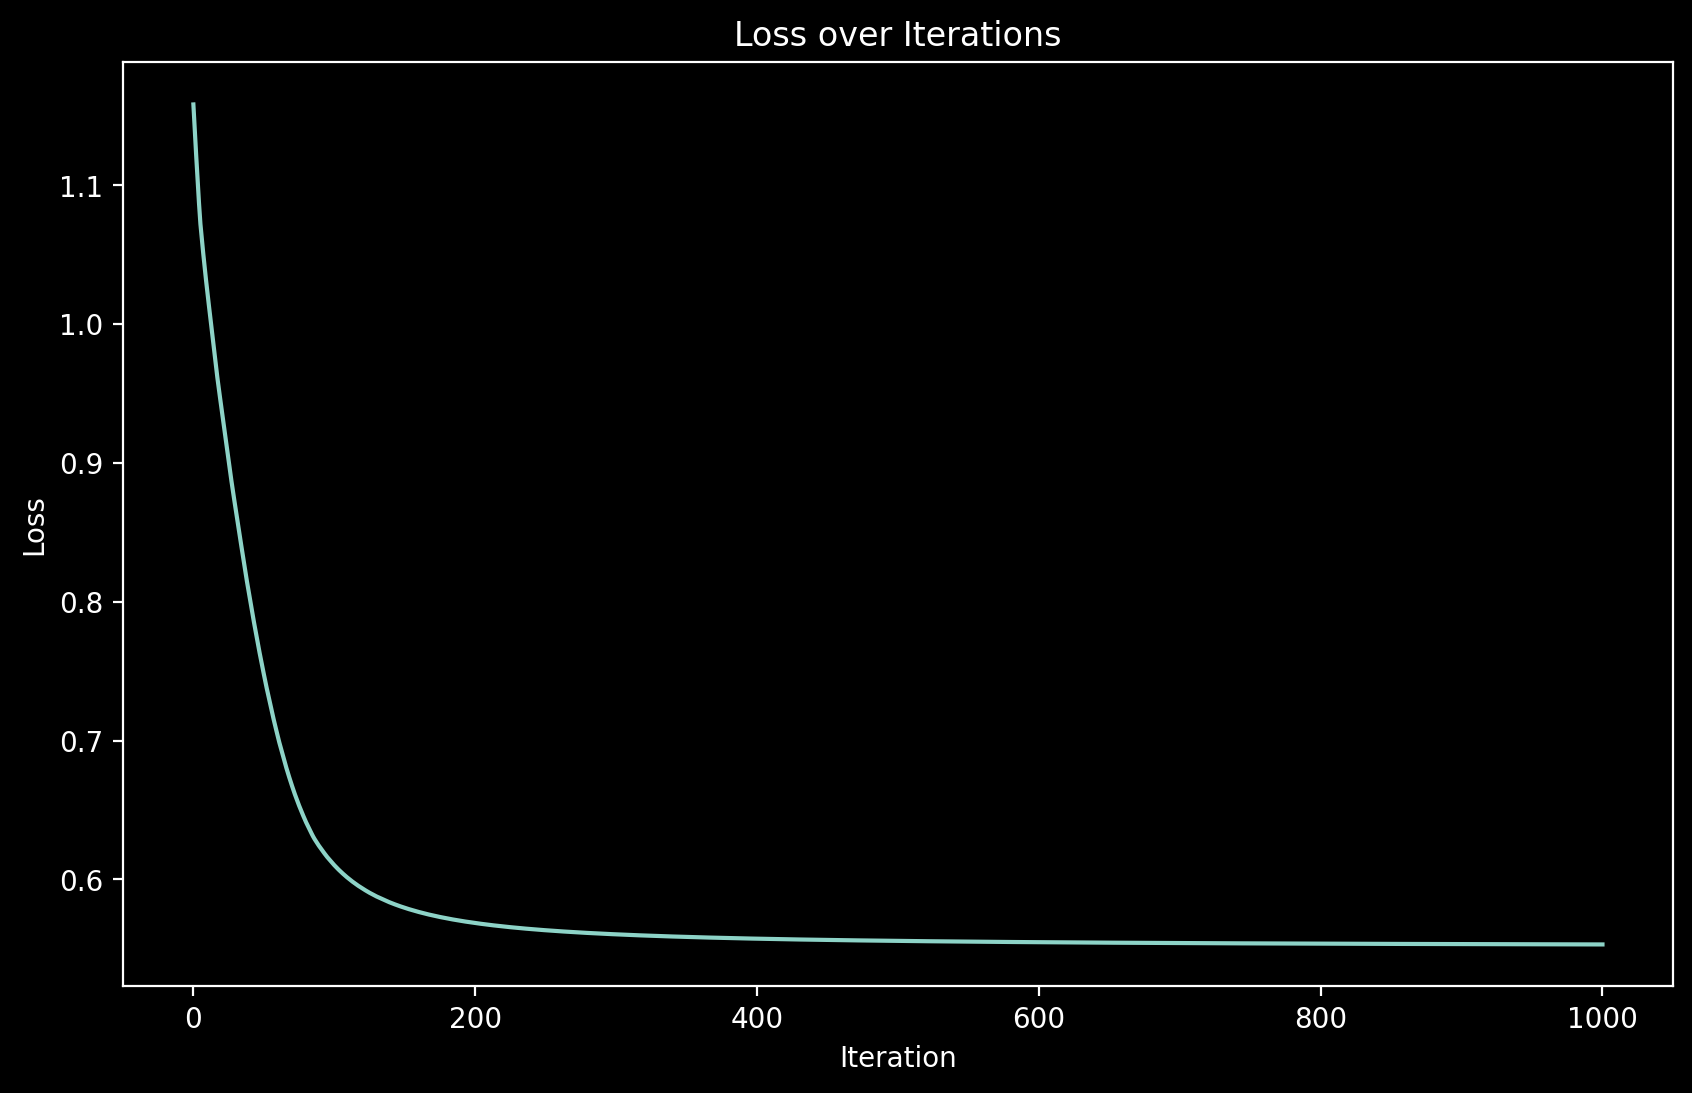

In [146]:
#plot loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(loss_vector)), loss_vector)
plt.title("Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")

In [147]:

nnfs.init()

X, y = nnfs.datasets.vertical_data(1000, 3)

fig = plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="*")
plt.title("Spiral Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.close()

# --- Pipeline ---
layer_1_dense = Dense(2,   256, "relu")
layer_1_activation = ReLU()

layer_2_dense = Dense(256, 256, "relu")
layer_2_activation = ReLU()

layer_3_dense = Dense(256, 256, "relu")
layer_3_activation = ReLU()

layer_4_dense = Dense(256, 256, "relu")  # final logits
layer_4_activation = ReLU()

layer_5_dense = Dense(256, 3, "softmax")   # final softmax
layer_5_activation = Softmax()

layers = [layer_1_dense, layer_2_dense, layer_3_dense, layer_4_dense, layer_5_dense]
loss_function = SoftmaxCategoricalCrossentropy()
optimizer = GradientDescentOptimizer(0.1)

epochs = 501
all_loss = []
all_accuracy = []

for epoch in range(epochs):
    # ----- forward -----
    layer_1_dense.forward(X)
    layer_1_activation.forward(layer_1_dense.output)

    layer_2_dense.forward(layer_1_activation.output)
    layer_2_activation.forward(layer_2_dense.output)

    layer_3_dense.forward(layer_2_activation.output)
    layer_3_activation.forward(layer_3_dense.output)

    layer_4_dense.forward(layer_3_activation.output)
    layer_4_activation.forward(layer_4_dense.output)

    layer_5_dense.forward(layer_4_activation.output)
    layer_5_activation.forward(layer_5_dense.output)

    # ----- loss -----
    loss = loss_function.forward(layer_5_dense.output, y)
    predictions = layer_5_activation.output
    accuracy = loss_function.accuracy(y, predictions)

    if epoch % 10 == 0:
        print(f"Loss at iteration {epoch} of {epochs}: {loss:.3f}, Accuracy: {accuracy:3f}, learning_rate : {optimizer.learning_rate:.3f}")
        all_loss.append(loss)
        all_accuracy.append(accuracy)

    # ----- backward -----
    last_gradients = loss_function.backward(loss_function.output, y)
    layer_5_dense.backward(last_gradients)

    layer_4_activation.backward(layer_5_dense.dLoss_dx)
    layer_4_dense.backward(layer_4_activation.dLoss_dx)

    layer_3_activation.backward(layer_4_dense.dLoss_dx)
    layer_3_dense.backward(layer_3_activation.dLoss_dx)

    layer_2_activation.backward(layer_3_dense.dLoss_dx)
    layer_2_dense.backward(layer_2_activation.dLoss_dx)

    layer_1_activation.backward(layer_2_dense.dLoss_dx)
    layer_1_dense.backward(layer_1_activation.dLoss_dx)

    # ----- update -----
    for layer in layers:
        optimizer.update_weights(layer)


Loss at iteration 0 of 501: 1.347, Accuracy: 0.135667, learning_rate : 0.100
Loss at iteration 10 of 501: 0.321, Accuracy: 0.891000, learning_rate : 0.100
Loss at iteration 20 of 501: 0.271, Accuracy: 0.898667, learning_rate : 0.100
Loss at iteration 30 of 501: 0.259, Accuracy: 0.893000, learning_rate : 0.100
Loss at iteration 40 of 501: 0.258, Accuracy: 0.896000, learning_rate : 0.100
Loss at iteration 50 of 501: 0.238, Accuracy: 0.903667, learning_rate : 0.100
Loss at iteration 60 of 501: 0.239, Accuracy: 0.900667, learning_rate : 0.100
Loss at iteration 70 of 501: 0.248, Accuracy: 0.903667, learning_rate : 0.100
Loss at iteration 80 of 501: 0.226, Accuracy: 0.908667, learning_rate : 0.100
Loss at iteration 90 of 501: 0.227, Accuracy: 0.910667, learning_rate : 0.100
Loss at iteration 100 of 501: 0.233, Accuracy: 0.909667, learning_rate : 0.100
Loss at iteration 110 of 501: 0.220, Accuracy: 0.915667, learning_rate : 0.100


KeyboardInterrupt: 

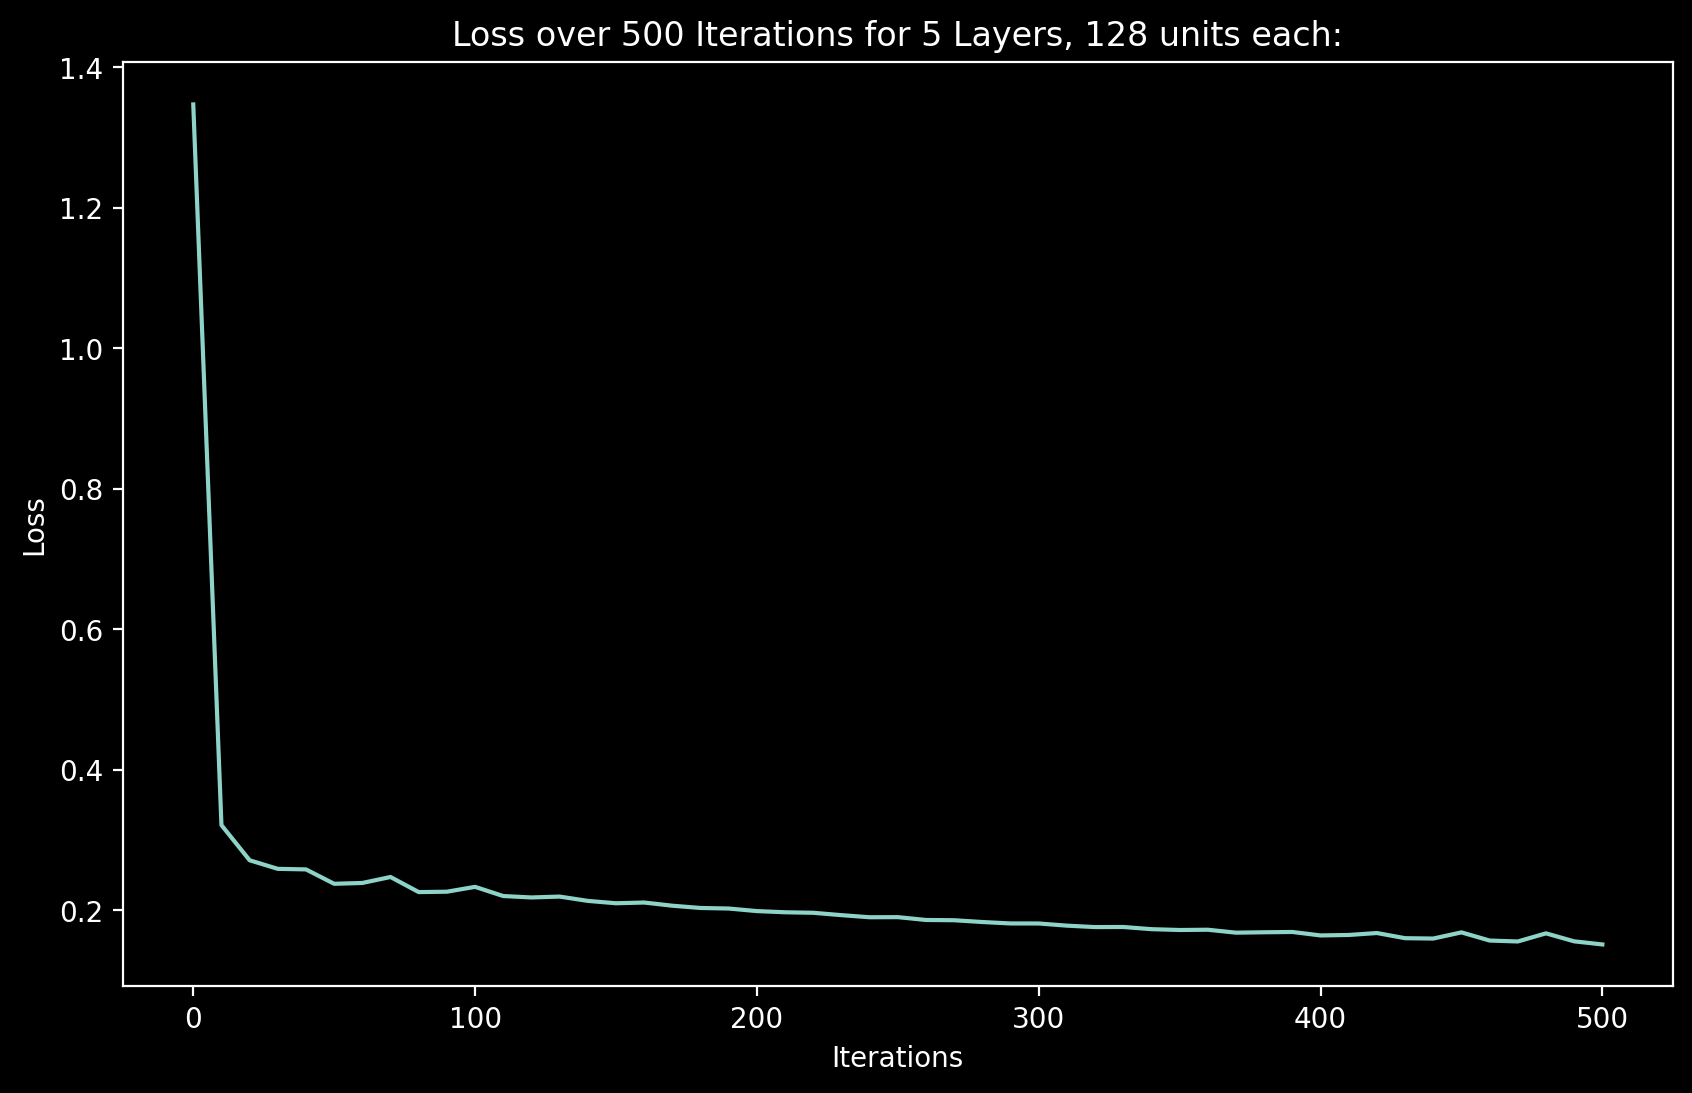

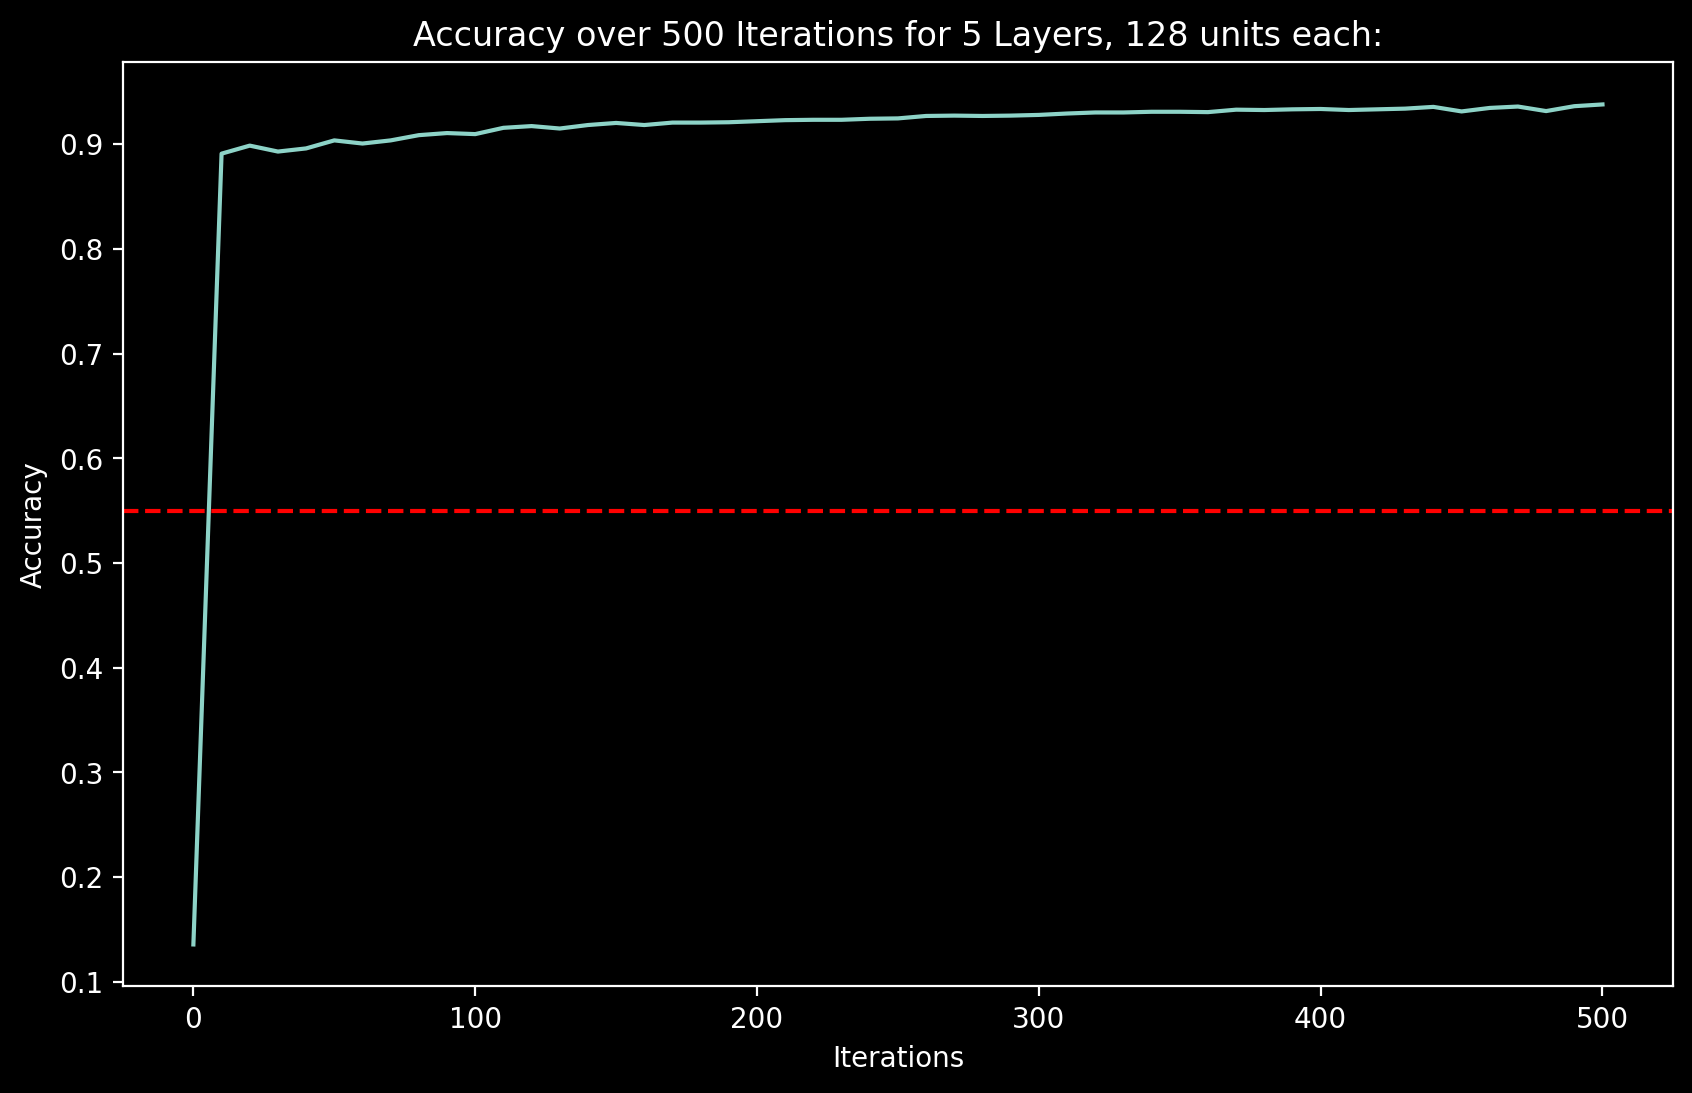

In [71]:
iterations = np.array(range(len(all_loss)))
iterations *= 10

plt.figure(figsize=(10, 6))
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title(f"Loss over {epochs-1} Iterations for {len(layers)} Layers, 128 units each:")
plt.plot(iterations, all_loss)
plt.show()
plt.close()

plt.figure(figsize=(10, 6))
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title(f"Accuracy over {epochs-1} Iterations for {len(layers)} Layers, 128 units each:")
plt.plot(iterations, all_accuracy)
plt.axhline(0.55, color='r', linestyle='--', label='Baseline Performance')
plt.show()
plt.close()

Often with gradient descent there's a chance of overshooting where the algorithm seems to miss the point of minima and spends extra time and computational power to reach the minima.

To prevent this, we can use a learning rate decay.

In [78]:
class GradientDescentOptimizerWithDecay :
    def __init__(self, learning_rate, decay = 0.) :
        self.learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.current_learning_rate = learning_rate
    def pre_update_weights(self) :
        self.current_learning_rate = self.learning_rate / (1 + self.decay * self.iterations)
    def update_weights(self, layer) :
        layer.weights += -self.current_learning_rate * layer.dLoss_dWeights
        layer.bias += -self.current_learning_rate * layer.dLoss_dBias
    def post_update_weights(self) :
        self.iterations += 1

In [79]:
nnfs.init()

X, y = nnfs.datasets.vertical_data(1000, 3)

fig = plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="*")
plt.title("Spiral Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.close()

# --- Pipeline ---
layer_1_dense = Dense(2,   256, "relu")
layer_1_activation = ReLU()

layer_2_dense = Dense(256, 256, "relu")
layer_2_activation = ReLU()

layer_3_dense = Dense(256, 256, "relu")
layer_3_activation = ReLU()

layer_4_dense = Dense(256, 256, "relu")  # final logits
layer_4_activation = ReLU()

layer_5_dense = Dense(256, 3, "softmax")   # final softmax
layer_5_activation = Softmax()

layers = [layer_1_dense, layer_2_dense, layer_3_dense, layer_4_dense, layer_5_dense]
loss_function = SoftmaxCategoricalCrossentropy()
optimizer = GradientDescentOptimizerWithDecay(0.1, 1e-3)

epochs = 501
all_loss = []
all_accuracy = []

for epoch in range(epochs):
    # ----- forward -----
    layer_1_dense.forward(X)
    layer_1_activation.forward(layer_1_dense.output)

    layer_2_dense.forward(layer_1_activation.output)
    layer_2_activation.forward(layer_2_dense.output)

    layer_3_dense.forward(layer_2_activation.output)
    layer_3_activation.forward(layer_3_dense.output)

    layer_4_dense.forward(layer_3_activation.output)
    layer_4_activation.forward(layer_4_dense.output)

    layer_5_dense.forward(layer_4_activation.output)
    layer_5_activation.forward(layer_5_dense.output)

    # ----- loss -----
    loss = loss_function.forward(layer_5_dense.output, y)
    predictions = layer_5_activation.output
    accuracy = loss_function.accuracy(y, predictions)

    if epoch % 10 == 0:
        print(f"Loss at iteration {epoch} of {epochs}: {loss:.3f}, Accuracy: {accuracy:3f}, learning_rate : {optimizer.current_learning_rate:.3f}")
        all_loss.append(loss)
        all_accuracy.append(accuracy)

    # ----- backward -----
    last_gradients = loss_function.backward(loss_function.output, y)
    layer_5_dense.backward(last_gradients)

    layer_4_activation.backward(layer_5_dense.dLoss_dx)
    layer_4_dense.backward(layer_4_activation.dLoss_dx)

    layer_3_activation.backward(layer_4_dense.dLoss_dx)
    layer_3_dense.backward(layer_3_activation.dLoss_dx)

    layer_2_activation.backward(layer_3_dense.dLoss_dx)
    layer_2_dense.backward(layer_2_activation.dLoss_dx)

    layer_1_activation.backward(layer_2_dense.dLoss_dx)
    layer_1_dense.backward(layer_1_activation.dLoss_dx)

    # ----- update -----
    optimizer.pre_update_weights()
    for layer in layers:
        optimizer.update_weights(layer)
    optimizer.post_update_weights()


Loss at iteration 0 of 501: 1.347, Accuracy: 0.135667, learning_rate : 0.100
Loss at iteration 10 of 501: 0.322, Accuracy: 0.891333, learning_rate : 0.099
Loss at iteration 20 of 501: 0.272, Accuracy: 0.897667, learning_rate : 0.098
Loss at iteration 30 of 501: 0.255, Accuracy: 0.895333, learning_rate : 0.097
Loss at iteration 40 of 501: 0.271, Accuracy: 0.893667, learning_rate : 0.096
Loss at iteration 50 of 501: 0.239, Accuracy: 0.903000, learning_rate : 0.095
Loss at iteration 60 of 501: 0.233, Accuracy: 0.904333, learning_rate : 0.094
Loss at iteration 70 of 501: 0.240, Accuracy: 0.904000, learning_rate : 0.094
Loss at iteration 80 of 501: 0.236, Accuracy: 0.906667, learning_rate : 0.093
Loss at iteration 90 of 501: 0.222, Accuracy: 0.909333, learning_rate : 0.092
Loss at iteration 100 of 501: 0.221, Accuracy: 0.913333, learning_rate : 0.091
Loss at iteration 110 of 501: 0.226, Accuracy: 0.912000, learning_rate : 0.090
Loss at iteration 120 of 501: 0.219, Accuracy: 0.916667, learni

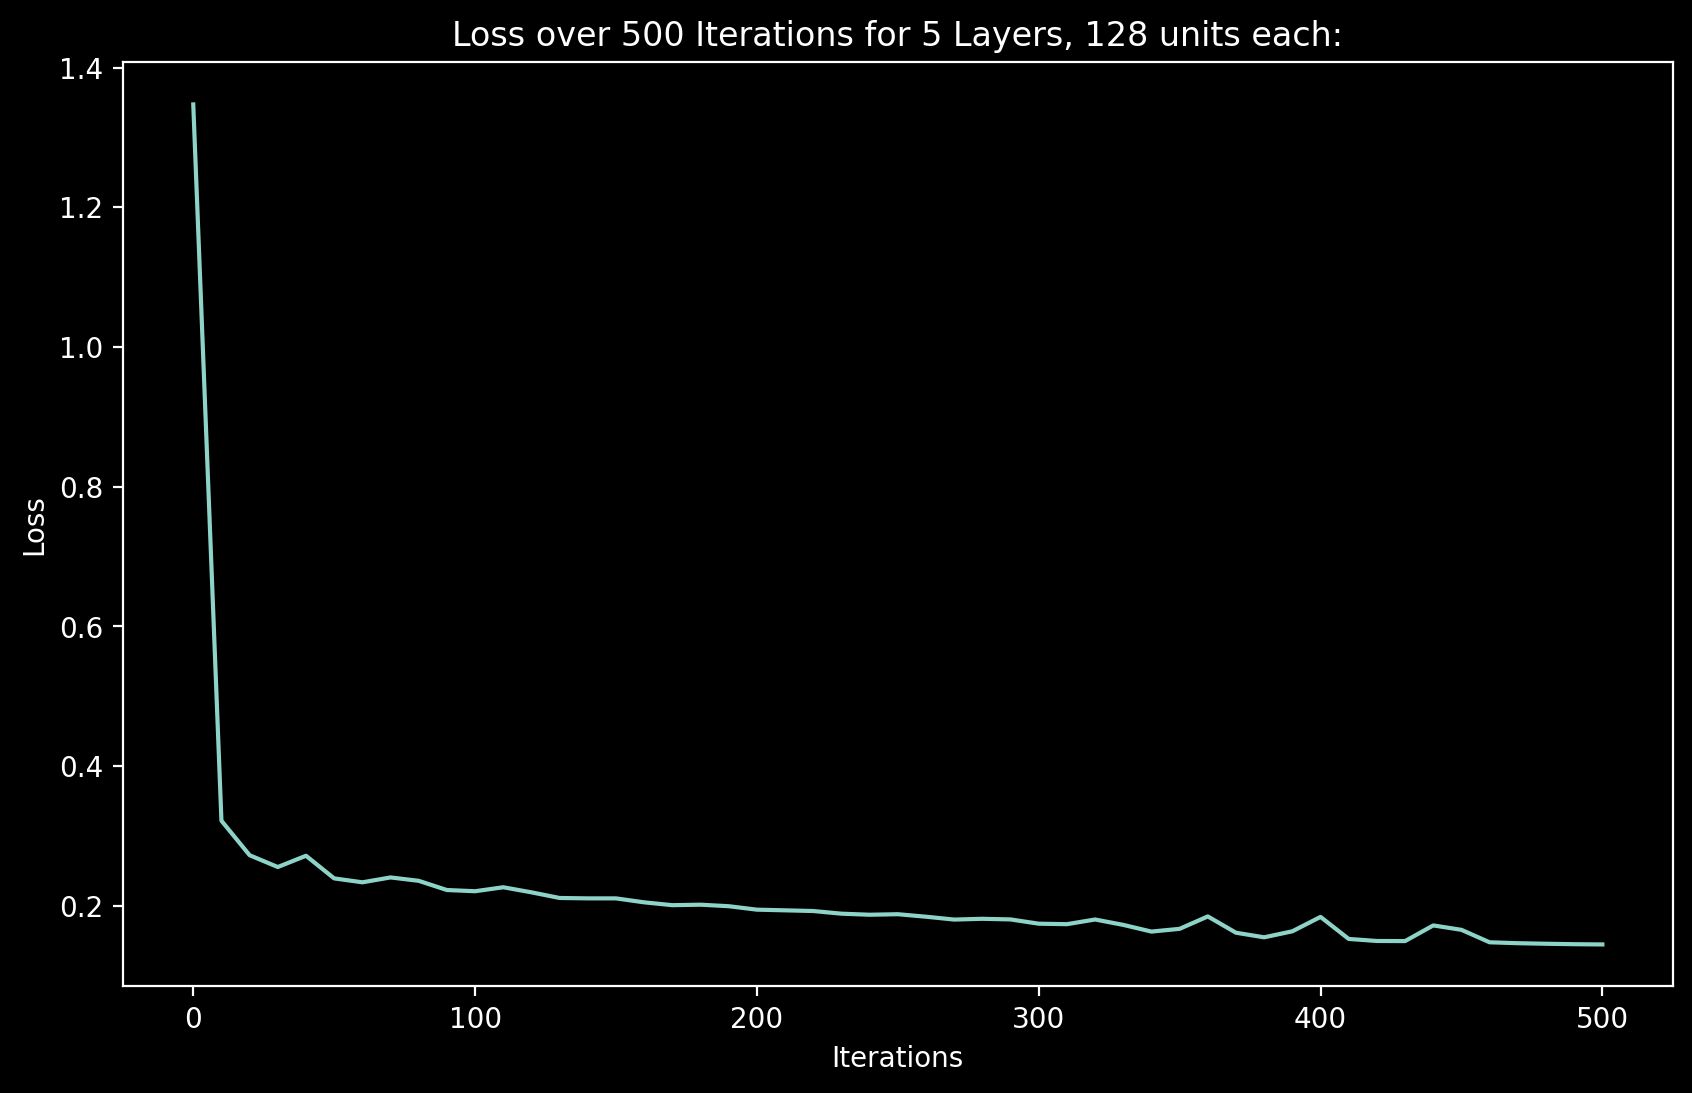

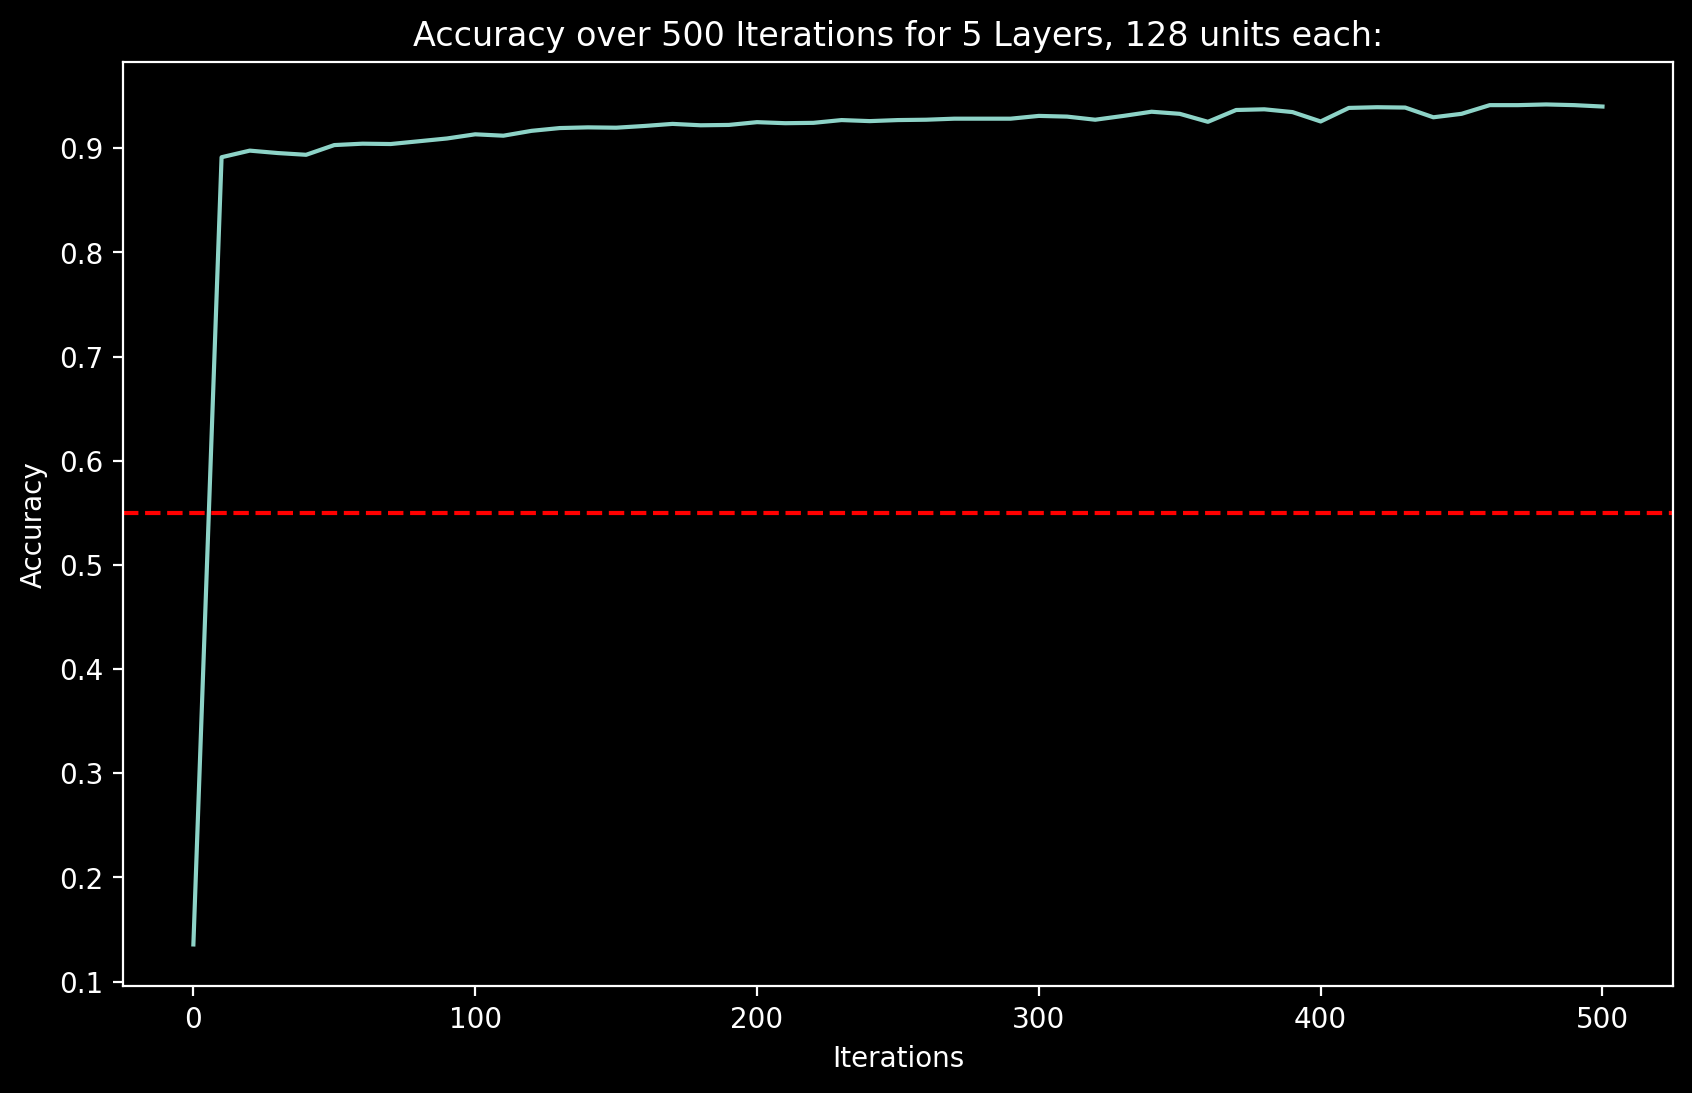

In [80]:
iterations = np.array(range(len(all_loss)))
iterations *= 10

plt.figure(figsize=(10, 6))
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title(f"Loss over {epochs-1} Iterations for {len(layers)} Layers, 128 units each:")
plt.plot(iterations, all_loss)
plt.show()
plt.close()

plt.figure(figsize=(10, 6))
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title(f"Accuracy over {epochs-1} Iterations for {len(layers)} Layers, 128 units each:")
plt.plot(iterations, all_accuracy)
plt.axhline(0.55, color='r', linestyle='--', label='Baseline Performance')
plt.show()
plt.close()

To reduce the oscillations in the gradient descent algorithm, we can use momentum.
This also helps us to escape local minima and reduce the time taken to reach the global minima.

In [88]:
class GradientDescentOptimizerWithMomentum :
    def __init__(self, learning_rate=1., decay = 0., momentum = 0.):
        self.current_learning_rate = learning_rate
        self.learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum
    def pre_update_params(self) :
        if self.decay :
            self.current_learning_rate = self.learning_rate / (1+self.decay*self.iterations)
    def update_weights(self, layer):
        if self.momentum :
            if not hasattr(layer, 'weight_momentum'):
                layer.weight_momentum = np.zeros_like(layer.weights)
                layer.bias_momentum = np.zeros_like(layer.bias)
            weight_updates = (self.momentum * layer.weight_momentum -
                              self.current_learning_rate * layer.dLoss_dWeights)
            layer.weight_momentum = weight_updates
            bias_updates = (self.momentum * layer.bias_momentum -
                            self.current_learning_rate * layer.dLoss_dBias)
            layer.bias_momentum = bias_updates
        else :
            weight_updates = -self.current_learning_rate * layer.dLoss_dWeights
            bias_updates = -self.current_learning_rate * layer.dLoss_dBias
        layer.weights += weight_updates
        layer.bias += bias_updates
    def update_params(self):
        self.iterations += 1

In [90]:
nnfs.init()

X, y = nnfs.datasets.vertical_data(1000, 3)

fig = plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="*")
plt.title("Spiral Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.close()

# --- Pipeline ---
layer_1_dense = Dense(2,   256, "relu")
layer_1_activation = ReLU()

layer_2_dense = Dense(256, 256, "relu")
layer_2_activation = ReLU()

layer_3_dense = Dense(256, 256, "relu")
layer_3_activation = ReLU()

layer_4_dense = Dense(256, 256, "relu")  # final logits
layer_4_activation = ReLU()

layer_5_dense = Dense(256, 3, "softmax")   # final softmax
layer_5_activation = Softmax()

layers = [layer_1_dense, layer_2_dense, layer_3_dense, layer_4_dense, layer_5_dense]
loss_function = SoftmaxCategoricalCrossentropy()
optimizer = GradientDescentOptimizerWithMomentum(0.1, 1e-3, 0.1)

epochs = 501
all_loss = []
all_accuracy = []

for epoch in range(epochs):
    # ----- forward -----
    layer_1_dense.forward(X)
    layer_1_activation.forward(layer_1_dense.output)

    layer_2_dense.forward(layer_1_activation.output)
    layer_2_activation.forward(layer_2_dense.output)

    layer_3_dense.forward(layer_2_activation.output)
    layer_3_activation.forward(layer_3_dense.output)

    layer_4_dense.forward(layer_3_activation.output)
    layer_4_activation.forward(layer_4_dense.output)

    layer_5_dense.forward(layer_4_activation.output)
    layer_5_activation.forward(layer_5_dense.output)

    # ----- loss -----
    loss = loss_function.forward(layer_5_dense.output, y)
    predictions = layer_5_activation.output
    accuracy = loss_function.accuracy(y, predictions)

    if epoch % 10 == 0:
        print(f"Loss at iteration {epoch} of {epochs}: {loss:.3f}, Accuracy: {accuracy:3f}, learning_rate : {optimizer.current_learning_rate:.3f}")
        all_loss.append(loss)
        all_accuracy.append(accuracy)

    # ----- backward -----
    last_gradients = loss_function.backward(loss_function.output, y)
    layer_5_dense.backward(last_gradients)

    layer_4_activation.backward(layer_5_dense.dLoss_dx)
    layer_4_dense.backward(layer_4_activation.dLoss_dx)

    layer_3_activation.backward(layer_4_dense.dLoss_dx)
    layer_3_dense.backward(layer_3_activation.dLoss_dx)

    layer_2_activation.backward(layer_3_dense.dLoss_dx)
    layer_2_dense.backward(layer_2_activation.dLoss_dx)

    layer_1_activation.backward(layer_2_dense.dLoss_dx)
    layer_1_dense.backward(layer_1_activation.dLoss_dx)

    # ----- update -----
    optimizer.pre_update_params()
    for layer in layers:
        optimizer.update_weights(layer)
    optimizer.update_params()

Loss at iteration 0 of 501: 1.347, Accuracy: 0.135667, learning_rate : 0.100
Loss at iteration 10 of 501: 0.312, Accuracy: 0.889333, learning_rate : 0.099
Loss at iteration 20 of 501: 0.265, Accuracy: 0.898667, learning_rate : 0.098
Loss at iteration 30 of 501: 0.246, Accuracy: 0.901000, learning_rate : 0.097
Loss at iteration 40 of 501: 0.239, Accuracy: 0.902333, learning_rate : 0.096
Loss at iteration 50 of 501: 0.291, Accuracy: 0.875667, learning_rate : 0.095
Loss at iteration 60 of 501: 0.228, Accuracy: 0.905667, learning_rate : 0.094
Loss at iteration 70 of 501: 0.222, Accuracy: 0.906667, learning_rate : 0.094
Loss at iteration 80 of 501: 0.222, Accuracy: 0.905000, learning_rate : 0.093
Loss at iteration 90 of 501: 0.251, Accuracy: 0.891333, learning_rate : 0.092
Loss at iteration 100 of 501: 0.210, Accuracy: 0.911000, learning_rate : 0.091
Loss at iteration 110 of 501: 0.209, Accuracy: 0.909333, learning_rate : 0.090
Loss at iteration 120 of 501: 0.237, Accuracy: 0.896000, learni

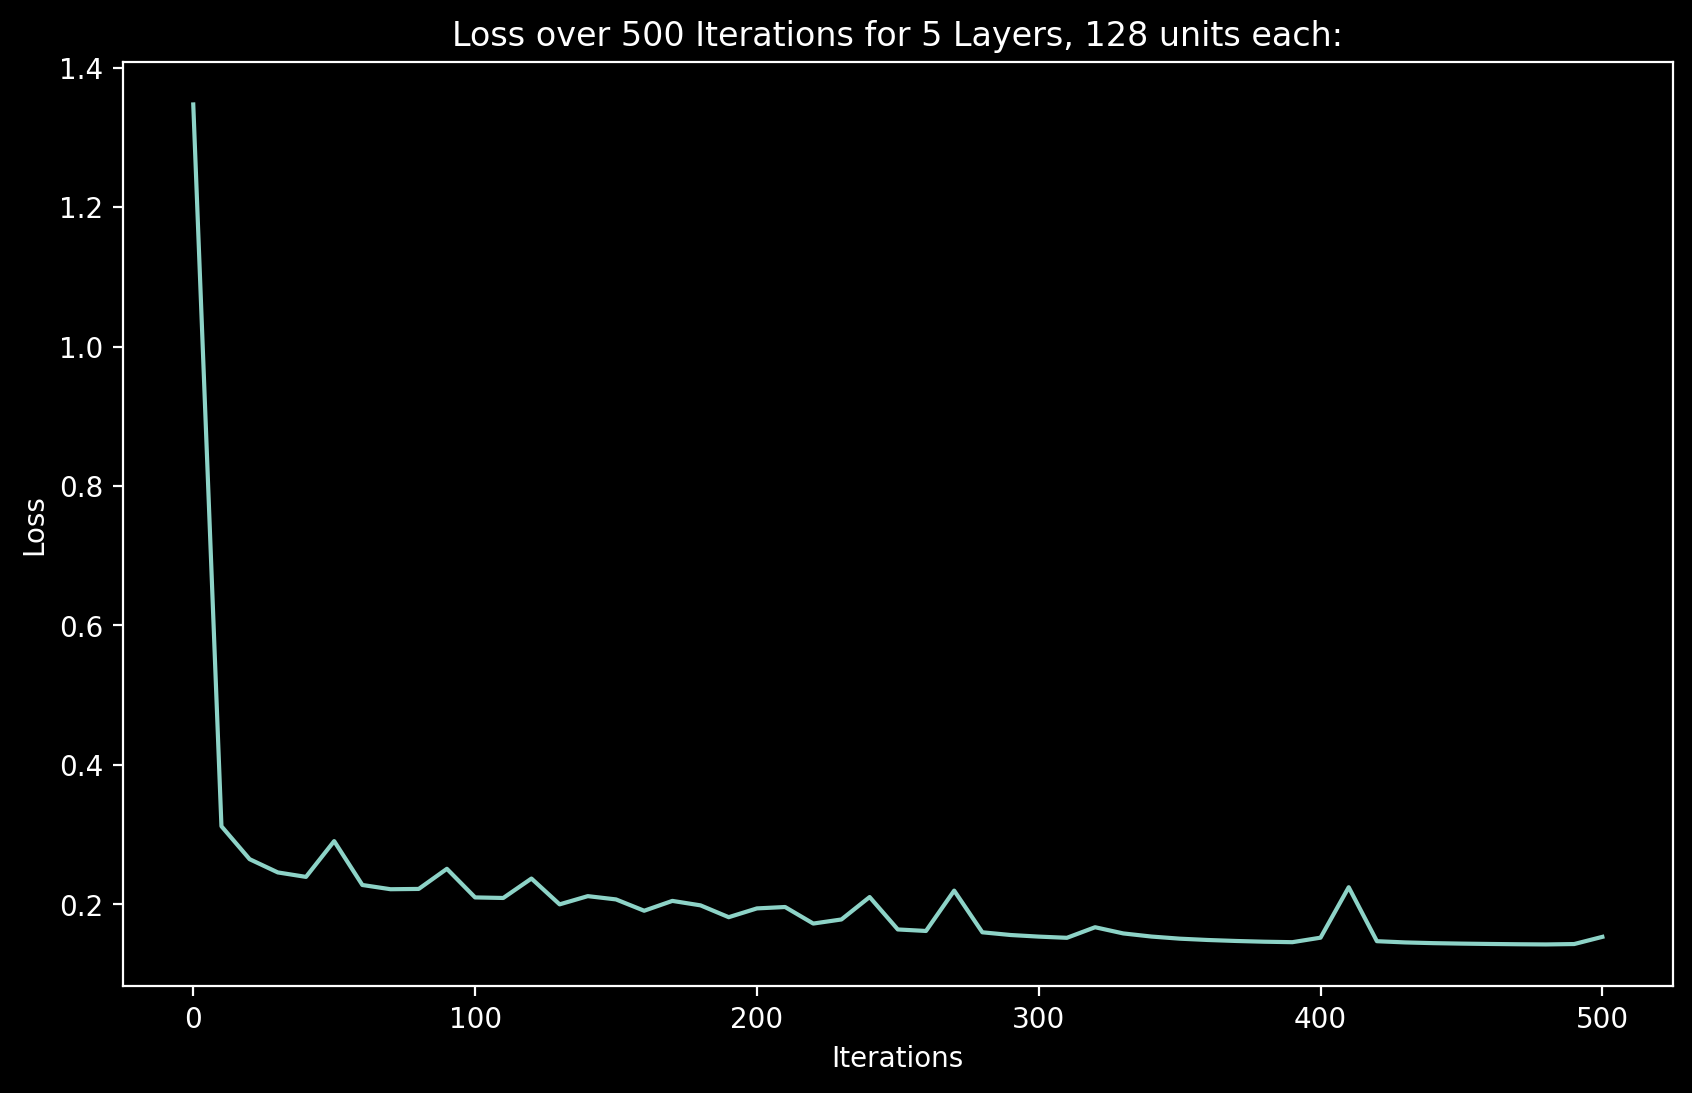

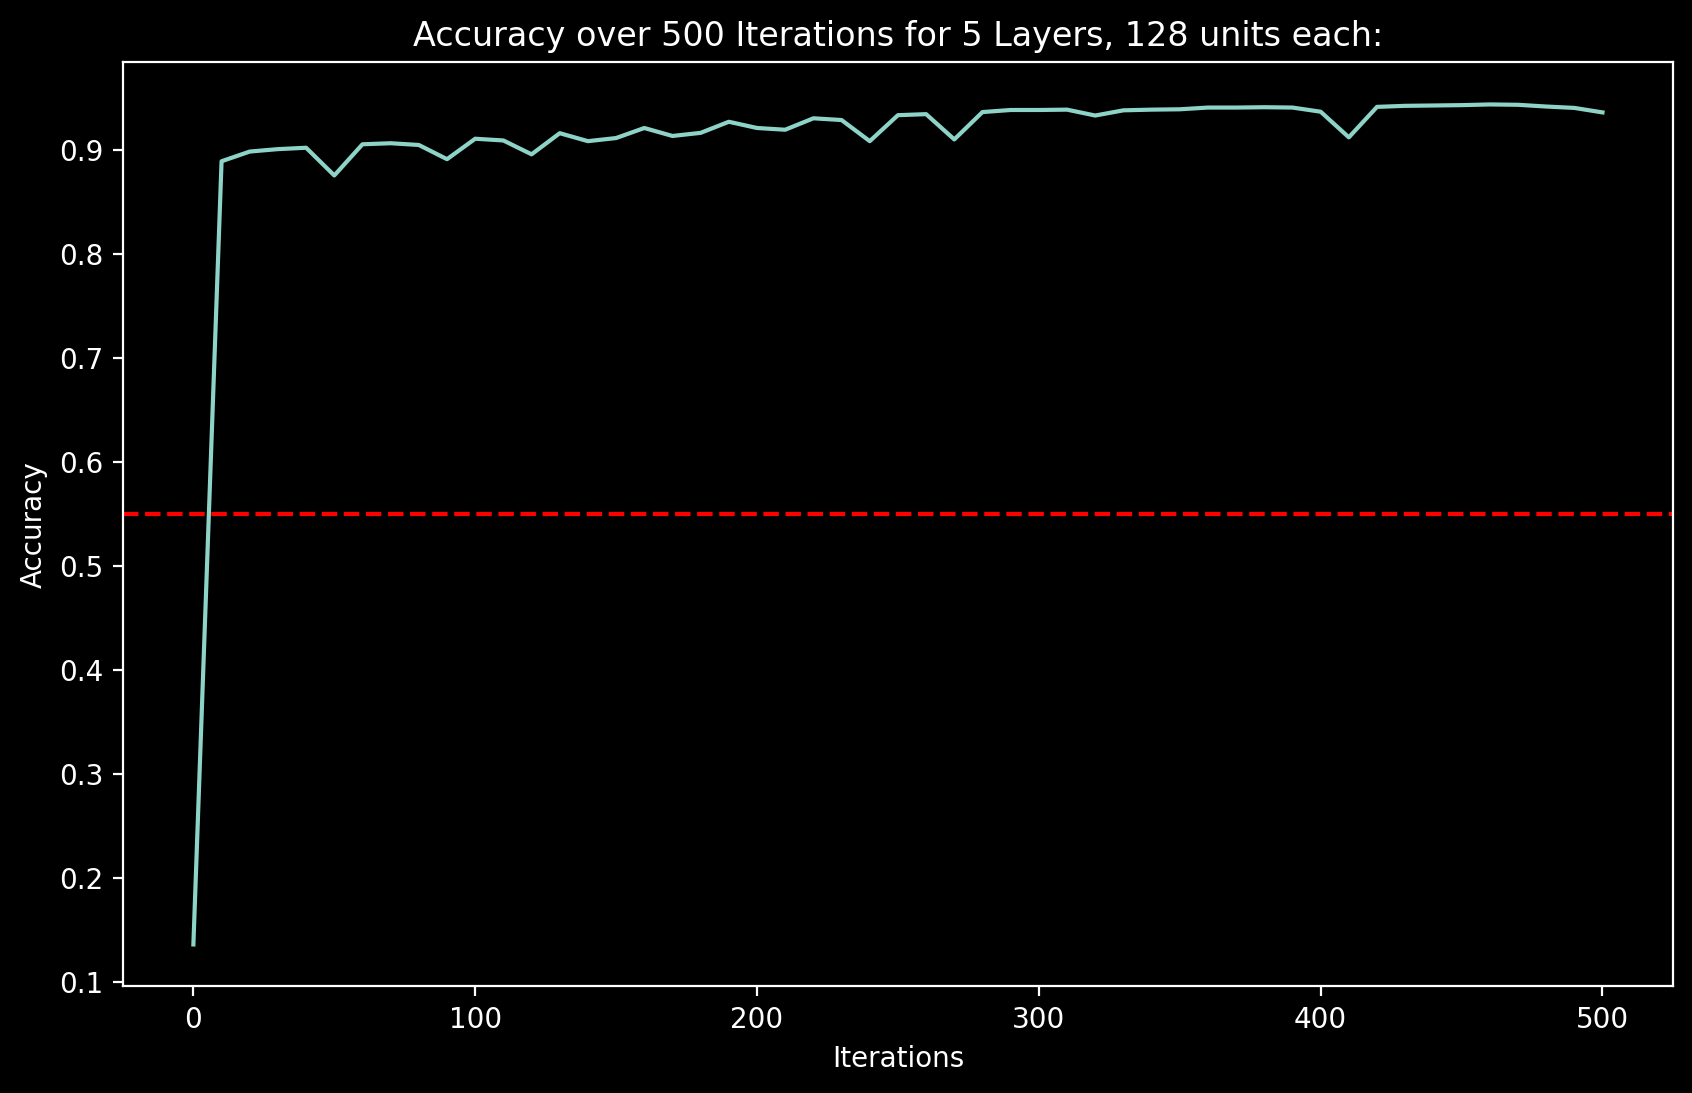

In [93]:
iterations = np.array(range(len(all_loss)))
iterations *= 10

plt.figure(figsize=(10, 6))
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title(f"Loss over {epochs-1} Iterations for {len(layers)} Layers, 128 units each:")
plt.plot(iterations, all_loss)
plt.show()
plt.close()

plt.figure(figsize=(10, 6))
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title(f"Accuracy over {epochs-1} Iterations for {len(layers)} Layers, 128 units each:")
plt.plot(iterations, all_accuracy)
plt.axhline(0.55, color='r', linestyle='--', label='Baseline Performance')
plt.show()
plt.close()

Another way to reduce the oscillations in the gradient descent algorithm is RMS Prop.


In [94]:
class GradientDescentOptimizerWithRMSProp :
    def __init__(self, learning_rate=1., decay = 0., rho = 0.):
        self.current_learning_rate = learning_rate
        self.learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.rho = rho
    def pre_update_params(self) :
        if self.decay :
            self.current_learning_rate = self.learning_rate / (1+self.decay*self.iterations)
    def update_weights(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.bias)
        layer.weight_cache = self.rho * layer.weight_cache + (1 - self.rho) * layer.dLoss_dWeights**2
        layer.bias_cache = self.rho * layer.bias_cache + (1 - self.rho) * layer.dLoss_dBias**2
        layer.weights += -self.current_learning_rate * layer.dLoss_dWeights / (np.sqrt(layer.weight_cache) + 1e-7)
        layer.bias += -self.current_learning_rate * layer.dLoss_dBias / (np.sqrt(layer.bias_cache) + 1e-7)
    def update_params(self):
        self.iterations += 1

In [149]:
nnfs.init()

X, y = nnfs.datasets.vertical_data(1000, 3)

fig = plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="*")
plt.title("Spiral Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.close()

# --- Pipeline ---
layer_1_dense = Dense(2,   256, "relu")
layer_1_activation = ReLU()

layer_2_dense = Dense(256, 256, "relu")
layer_2_activation = ReLU()

layer_3_dense = Dense(256, 256, "relu")
layer_3_activation = ReLU()

layer_4_dense = Dense(256, 256, "relu")  # final logits
layer_4_activation = ReLU()

layer_5_dense = Dense(256, 3, "softmax")   # final softmax
layer_5_activation = Softmax()

layers = [layer_1_dense, layer_2_dense, layer_3_dense, layer_4_dense, layer_5_dense]
loss_function = SoftmaxCategoricalCrossentropy()
optimizer = GradientDescentOptimizerWithRMSProp(0.001, 1e-5, 0.999)

epochs = 501
all_loss = []
all_accuracy = []

for epoch in range(epochs):
    # ----- forward -----
    layer_1_dense.forward(X)
    layer_1_activation.forward(layer_1_dense.output)

    layer_2_dense.forward(layer_1_activation.output)
    layer_2_activation.forward(layer_2_dense.output)

    layer_3_dense.forward(layer_2_activation.output)
    layer_3_activation.forward(layer_3_dense.output)

    layer_4_dense.forward(layer_3_activation.output)
    layer_4_activation.forward(layer_4_dense.output)

    layer_5_dense.forward(layer_4_activation.output)
    layer_5_activation.forward(layer_5_dense.output)

    # ----- loss -----
    loss = loss_function.forward(layer_5_dense.output, y)
    predictions = layer_5_activation.output
    accuracy = loss_function.accuracy(y, predictions)

    if epoch % 10 == 0:
        print(f"Loss at iteration {epoch} of {epochs}: {loss:.3f}, Accuracy: {accuracy:3f}, learning_rate : {optimizer.current_learning_rate:.3f}")
    all_loss.append(loss)
    all_accuracy.append(accuracy)

    # ----- backward -----
    last_gradients = loss_function.backward(loss_function.output, y)
    layer_5_dense.backward(last_gradients)

    layer_4_activation.backward(layer_5_dense.dLoss_dx)
    layer_4_dense.backward(layer_4_activation.dLoss_dx)

    layer_3_activation.backward(layer_4_dense.dLoss_dx)
    layer_3_dense.backward(layer_3_activation.dLoss_dx)

    layer_2_activation.backward(layer_3_dense.dLoss_dx)
    layer_2_dense.backward(layer_2_activation.dLoss_dx)

    layer_1_activation.backward(layer_2_dense.dLoss_dx)
    layer_1_dense.backward(layer_1_activation.dLoss_dx)

    # ----- update -----
    optimizer.pre_update_params()
    for layer in layers:
        optimizer.update_weights(layer)
    optimizer.update_params()

Loss at iteration 0 of 501: 1.347, Accuracy: 0.135667, learning_rate : 0.001
Loss at iteration 10 of 501: 0.496, Accuracy: 0.754333, learning_rate : 0.001
Loss at iteration 20 of 501: 0.264, Accuracy: 0.895667, learning_rate : 0.001
Loss at iteration 30 of 501: 0.241, Accuracy: 0.901000, learning_rate : 0.001
Loss at iteration 40 of 501: 0.239, Accuracy: 0.894000, learning_rate : 0.001
Loss at iteration 50 of 501: 0.224, Accuracy: 0.906667, learning_rate : 0.001
Loss at iteration 60 of 501: 0.216, Accuracy: 0.909000, learning_rate : 0.001
Loss at iteration 70 of 501: 0.208, Accuracy: 0.913333, learning_rate : 0.001
Loss at iteration 80 of 501: 0.204, Accuracy: 0.919667, learning_rate : 0.001
Loss at iteration 90 of 501: 0.277, Accuracy: 0.890000, learning_rate : 0.001
Loss at iteration 100 of 501: 0.176, Accuracy: 0.930000, learning_rate : 0.001
Loss at iteration 110 of 501: 0.160, Accuracy: 0.935667, learning_rate : 0.001
Loss at iteration 120 of 501: 0.175, Accuracy: 0.930667, learni

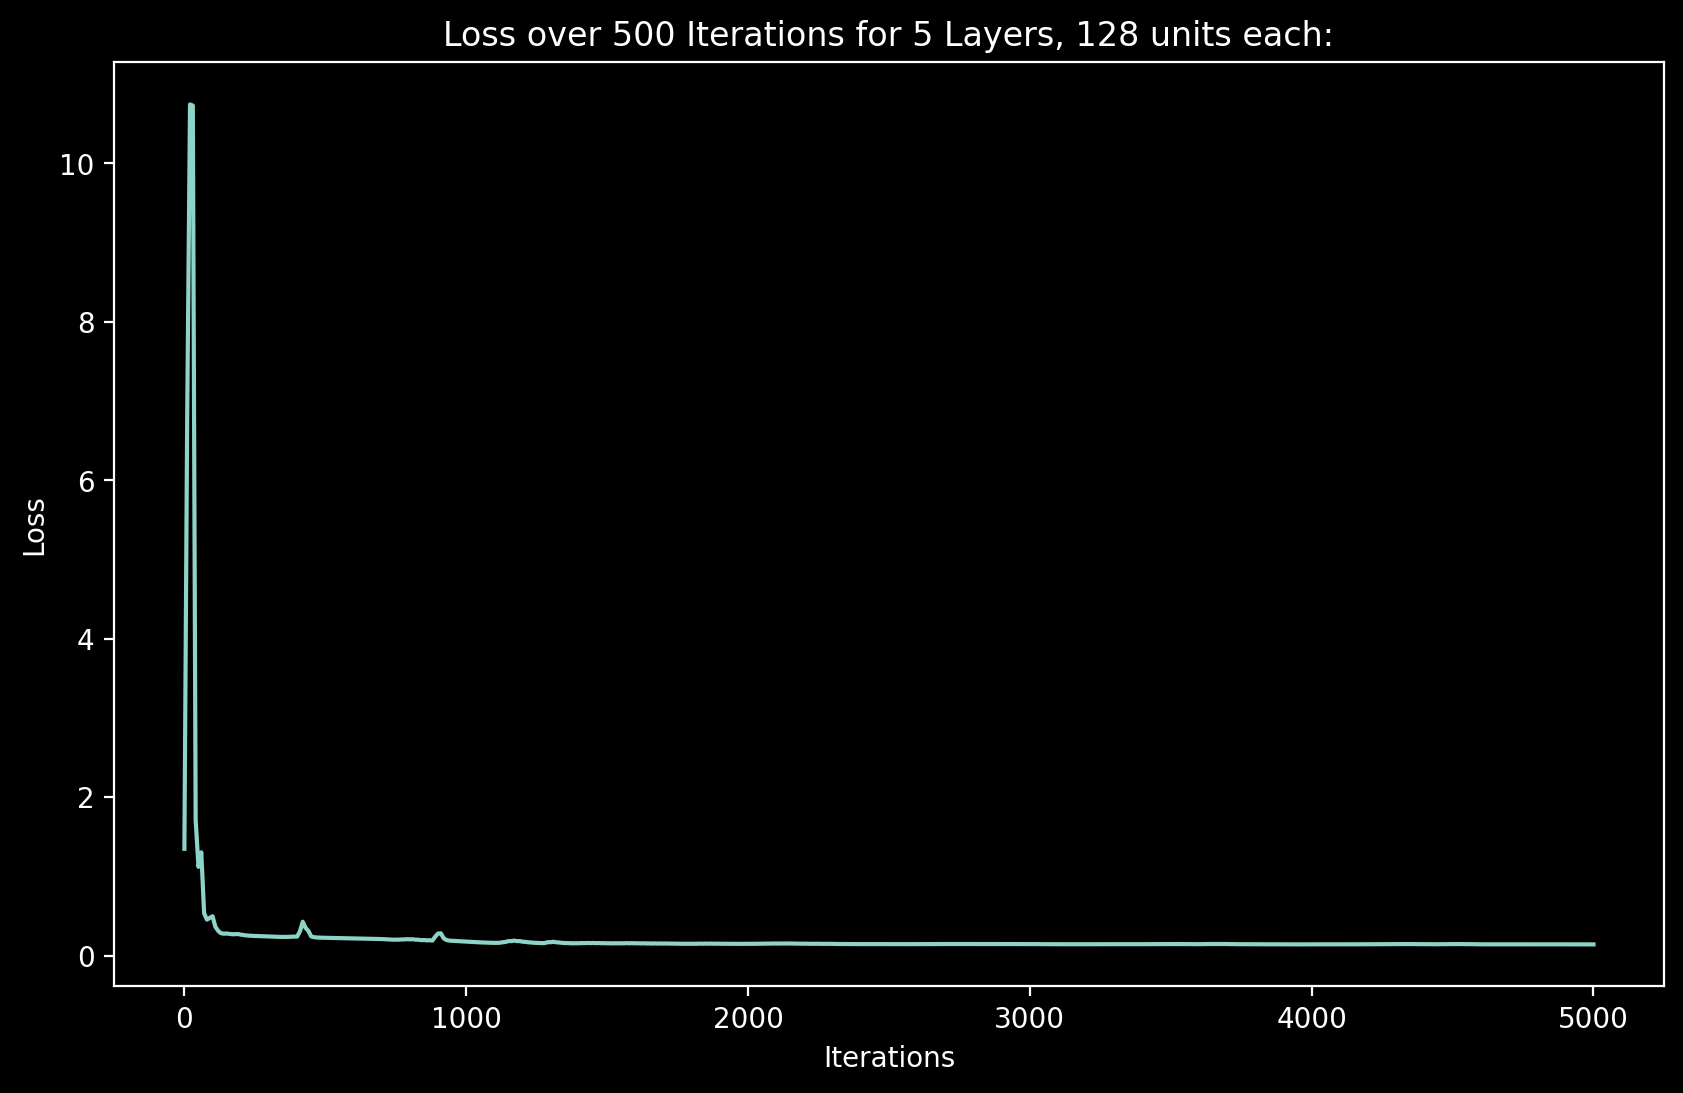

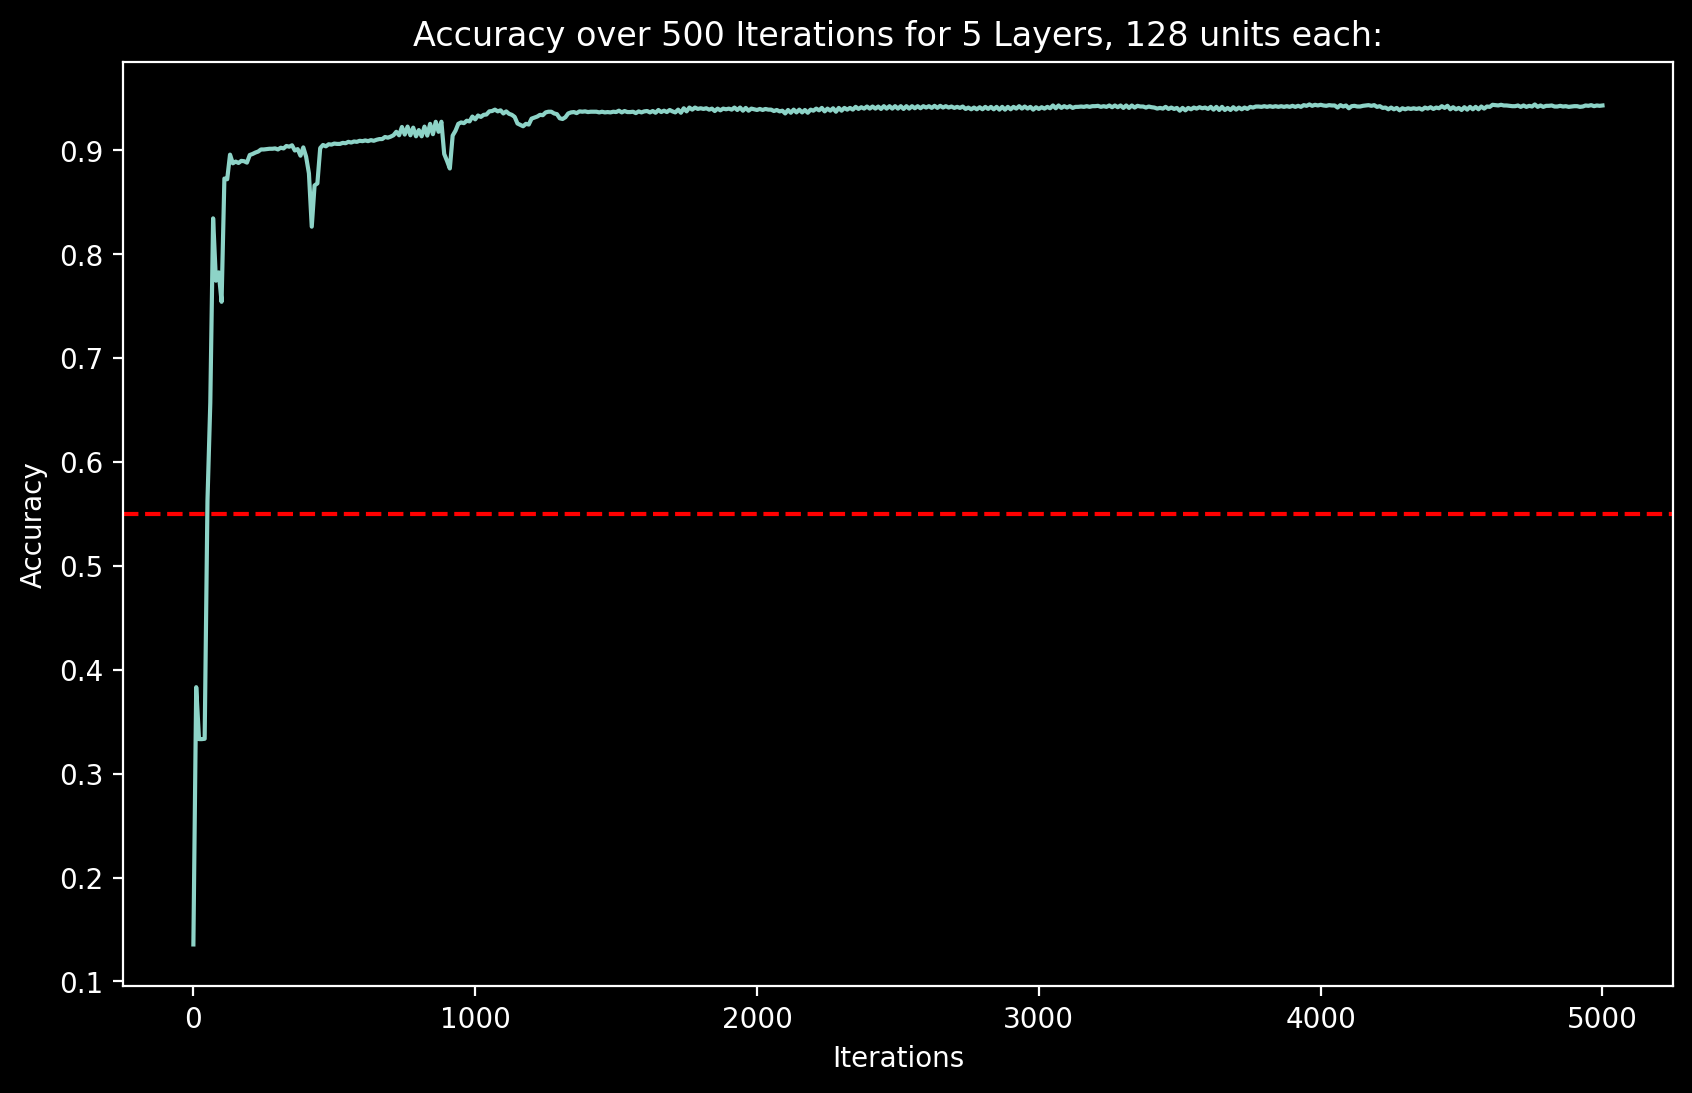

In [150]:
iterations = np.array(range(len(all_loss)))
iterations *= 10

plt.figure(figsize=(10, 6))
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title(f"Loss over {epochs-1} Iterations for {len(layers)} Layers, 128 units each:")
plt.plot(iterations, all_loss)
plt.show()
plt.close()

plt.figure(figsize=(10, 6))
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title(f"Accuracy over {epochs-1} Iterations for {len(layers)} Layers, 128 units each:")
plt.plot(iterations, all_accuracy)
plt.axhline(0.55, color='r', linestyle='--', label='Baseline Performance')
plt.show()
plt.close()

When it comes to optimizers, one of the most widely used is the Adam optimizer.
It's robust to a wide range of learning rates and is a good default choice for most problems.
It really is a best-of-both-worlds optimizer, combining the benefits of both momentum and RMSProp. <br>
The mathematical derivation of the Adam Optimizer is somewhat like this: <br>
V_dw = μ.V_dw + (1-μ)dw <br>
V_db = μ.V_db + (1-μ)db <br>
where μ is the decay rate hyperparameter for momentum. <br>
S_dw = β.S_dw + (1-β)dw <br>
S_db = β.S_db + (1-β)db <br>
where β is the decay rate hyperparameter for momentum. <br>
The bias corrected values for these parameters are: <br>
V_dw_corr = V_dw / (1-μᵗ);
 V_db_corr = V_db / (1-μᵗ)<br>
S_dw_corr = S_dw / (1-βᵗ);
S_dw_corr = S_dw / (1-βᵗ) <br>
Combining the updating formula for both momentum and RMS prop, we get: <br>
w = w0 - (α.V_dw_corr)/(√S_dw_corr + ϵ); <br>
b = b0 - (α.V_db_corr)/(√S_db_corr + ϵ) <br>
Where ϵ is a very small number for prevention of divbyzero error.


In [151]:
class AdamOptimizer:
    def __init__(self, learning_rate=1., decay = 0., momentum = 0., rho = 0.):
        self.current_learning_rate = learning_rate
        self.learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.rho = rho
        self.momentum = momentum
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1 + self.decay * self.iterations)
    def update_weights(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.bias)
            layer.weight_momentum = np.zeros_like(layer.weights)
            layer.bias_momentum = np.zeros_like(layer.bias)
        layer.weight_momentum = self.decay * layer.weight_momentum + (1 - self.decay) * layer.dLoss_dWeights
        layer.bias_momentum = self.decay * layer.bias_momentum + (1 - self.decay) * layer.dLoss_dBias
        weight_momentum_corrected = layer.weight_momentum / (1 - self.decay ** self.iterations)
        bias_momentum_corrected = layer.bias_momentum / (1 - self.decay ** self.iterations)
        layer.weight_cache = self.rho * layer.weight_cache + (1 - self.rho) * layer.dLoss_dWeights**2
        layer.bias_cache = self.rho * layer.bias_cache + (1 - self.rho) * layer.dLoss_dBias**2
        weight_cache_corrected = layer.weight_cache / (1 - self.rho ** self.iterations)
        bias_cache_corrected = layer.bias_cache / (1 - self.rho ** self.iterations)
        layer.weights += -self.current_learning_rate * weight_momentum_corrected / (np.sqrt(weight_cache_corrected) + 1e-7)
        layer.bias += -self.current_learning_rate * bias_momentum_corrected / (np.sqrt(bias_cache_corrected) + 1e-7)
    def update_params(self):
        self.iterations += 1

In [ ]:
nnfs.init()

X, y = nnfs.datasets.vertical_data(1000, 3)

fig = plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="*")
plt.title("Spiral Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.close()

# --- Pipeline ---
layer_1_dense = Dense(2,   256, "relu")
layer_1_activation = ReLU()

layer_2_dense = Dense(256, 256, "relu")
layer_2_activation = ReLU()

layer_3_dense = Dense(256, 256, "relu")
layer_3_activation = ReLU()

layer_4_dense = Dense(256, 256, "relu")  # final logits
layer_4_activation = ReLU()

layer_5_dense = Dense(256, 3, "softmax")   # final softmax
layer_5_activation = Softmax()

layers = [layer_1_dense, layer_2_dense, layer_3_dense, layer_4_dense, layer_5_dense]
loss_function = SoftmaxCategoricalCrossentropy()
optimizer = AdamOptimizer(0.01, 1e-5, 0.9, 0.9)

epochs = 501
all_loss = []
all_accuracy = []

for epoch in range(epochs):
    # ----- forward -----
    layer_1_dense.forward(X)
    layer_1_activation.forward(layer_1_dense.output)

    layer_2_dense.forward(layer_1_activation.output)
    layer_2_activation.forward(layer_2_dense.output)

    layer_3_dense.forward(layer_2_activation.output)
    layer_3_activation.forward(layer_3_dense.output)

    layer_4_dense.forward(layer_3_activation.output)
    layer_4_activation.forward(layer_4_dense.output)

    layer_5_dense.forward(layer_4_activation.output)
    layer_5_activation.forward(layer_5_dense.output)

    # ----- loss -----
    loss = loss_function.forward(layer_5_dense.output, y)
    predictions = layer_5_activation.output
    accuracy = loss_function.accuracy(y, predictions)

    if epoch % 10 == 0:
        print(f"Loss at iteration {epoch} of {epochs}: {loss:.3f}, Accuracy: {accuracy:3f}, learning_rate : {optimizer.current_learning_rate:.3f}")
        all_loss.append(loss)
        all_accuracy.append(accuracy)

    # ----- backward -----
    last_gradients = loss_function.backward(loss_function.output, y)
    layer_5_dense.backward(last_gradients)

    layer_4_activation.backward(layer_5_dense.dLoss_dx)
    layer_4_dense.backward(layer_4_activation.dLoss_dx)

    layer_3_activation.backward(layer_4_dense.dLoss_dx)
    layer_3_dense.backward(layer_3_activation.dLoss_dx)

    layer_2_activation.backward(layer_3_dense.dLoss_dx)
    layer_2_dense.backward(layer_2_activation.dLoss_dx)

    layer_1_activation.backward(layer_2_dense.dLoss_dx)
    layer_1_dense.backward(layer_1_activation.dLoss_dx)

    # ----- update -----
    optimizer.pre_update_params()
    for layer in layers:
        optimizer.update_weights(layer)
    optimizer.update_params()